In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import copy as cp
import numpy as np

In [2]:
data = pd.read_csv('Datasets/PLACES__Local_Data_for_Better_Health__County_Data_2022_release.csv')

# Descriptive Analytics

In [3]:
data.head()

Year StateAbbr      StateDesc LocationName DataSource         Category  \
0  2020        US  United States          NaN      BRFSS       Prevention   
1  2020        AL        Alabama      Colbert      BRFSS  Health Outcomes   
2  2020        AL        Alabama        Coosa      BRFSS  Health Outcomes   
3  2019        AL        Alabama         Dale      BRFSS       Prevention   
4  2020        AL        Alabama         Dale      BRFSS  Health Outcomes   

                                             Measure Data_Value_Unit  \
0  Current lack of health insurance among adults ...               %   
1             Arthritis among adults aged >=18 years               %   
2             Arthritis among adults aged >=18 years               %   
3  Cholesterol screening among adults aged >=18 y...               %   
4                Stroke among adults aged >=18 years               %   

           Data_Value_Type  Data_Value  ...  Data_Value_Footnote  \
0         Crude prevalence        15.3  ...                  NaN   
1         Crude prevalence        34.8  ...                  NaN   
2         Crude prevalence        37.8  ...                  NaN   
3  Age-adjusted prevalence        86.6  ...                  NaN   
4         Crude prevalence         4.2  ...                  NaN   

   Low_Confidence_Limit  High_Confidence_Limit  TotalPopulation  LocationID  \
0                  15.0                   15.7        331449281          59   
1                  33.6                   36.1            55411        1033   
2                  36.5                   39.1            10650        1037   
3                  85.4                   87.7            48959        1045   
4                   3.8                    4.7            48959        1045   

   CategoryID   MeasureId DataValueTypeID    Short_Question_Text  \
0     PREVENT     ACCESS2          CrdPrv       Health Insurance   
1     HLTHOUT   ARTHRITIS          CrdPrv              Arthritis   
2     HLTHOUT   ARTHRITIS          CrdPrv              Arthritis   
3     PREVENT  CHOLSCREEN       AgeAdjPrv  Cholesterol Screening   
4     HLTHOUT      STROKE          CrdPrv                 Stroke   

                      Geolocation  
0                             NaN  
1   POINT (-87.8014569 34.703112)  
2  POINT (-86.2434818 32.9314453)  
3   POINT (-85.609476 31.4306536)  
4   POINT (-85.609476 31.4306536)  

[5 rows x 21 columns]

In [4]:
# Feature and their respective categories
feature_categories = pd.DataFrame({
    'Feature': data.columns,
    'Categories': data.apply(lambda x: x.unique())
})

feature_categories

Feature  \
Year                                              Year   
StateAbbr                                    StateAbbr   
StateDesc                                    StateDesc   
LocationName                              LocationName   
DataSource                                  DataSource   
Category                                      Category   
Measure                                        Measure   
Data_Value_Unit                        Data_Value_Unit   
Data_Value_Type                        Data_Value_Type   
Data_Value                                  Data_Value   
Data_Value_Footnote_Symbol  Data_Value_Footnote_Symbol   
Data_Value_Footnote                Data_Value_Footnote   
Low_Confidence_Limit              Low_Confidence_Limit   
High_Confidence_Limit            High_Confidence_Limit   
TotalPopulation                        TotalPopulation   
LocationID                                  LocationID   
CategoryID                                  CategoryID   
MeasureId                                    MeasureId   
DataValueTypeID                        DataValueTypeID   
Short_Question_Text                Short_Question_Text   
Geolocation                                Geolocation   

                                                                   Categories  
Year                                                             [2020, 2019]  
StateAbbr                   [US, AL, AK, AZ, AR, CA, CO, DE, FL, GA, HI, I...  
StateDesc                   [United States, Alabama, Alaska, Arizona, Arka...  
LocationName                [nan, Colbert, Coosa, Dale, DeKalb, Geneva, Ha...  
DataSource                                                            [BRFSS]  
Category                    [Prevention, Health Outcomes, Health Risk Beha...  
Measure                     [Current lack of health insurance among adults...  
Data_Value_Unit                                                           [%]  
Data_Value_Type                   [Crude prevalence, Age-adjusted prevalence]  
Data_Value                  [15.3, 34.8, 37.8, 86.6, 4.2, 36.4, 38.0, 83.2...  
Data_Value_Footnote_Symbol                                              [nan]  
Data_Value_Footnote                                                     [nan]  
Low_Confidence_Limit        [15.0, 33.6, 36.5, 85.4, 3.8, 35.0, 36.6, 81.1...  
High_Confidence_Limit       [15.7, 36.1, 39.1, 87.7, 4.7, 37.8, 39.4, 85.1...  
TotalPopulation             [331449281, 55411, 10650, 48959, 71658, 26411,...  
LocationID                  [59, 1033, 1037, 1045, 1049, 1061, 1065, 1081,...  
CategoryID                              [PREVENT, HLTHOUT, RISKBEH, HLTHSTAT]  
MeasureId                   [ACCESS2, ARTHRITIS, CHOLSCREEN, STROKE, CERVI...  
DataValueTypeID                                           [CrdPrv, AgeAdjPrv]  
Short_Question_Text         [Health Insurance, Arthritis, Cholesterol Scre...  
Geolocation                 [nan, POINT (-87.8014569 34.703112), POINT (-8...

In [5]:
# Features with identical values or NaN values
identical_features = []
nan_features = []

for column in data.columns:
    # Check if all elements in the column are the same
    if data[column].nunique() == 1:
        identical_features.append(column)
    # Check if all elements in the column are NaN
    if data[column].isna().all():
        nan_features.append(column)

# Print the features with identical values or NaN values
if len(identical_features) > 0:
    print("---------Features with identical values---------")
    for feature in identical_features:
        print(feature)
    print("\n---------Features with NaN values---------")
    for feature in nan_features:
        print(feature)

---------Features with identical values---------
DataSource
Data_Value_Unit

---------Features with NaN values---------
Data_Value_Footnote_Symbol
Data_Value_Footnote


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188456 entries, 0 to 188455
Data columns (total 21 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Year                        188456 non-null  int64  
 1   StateAbbr                   188456 non-null  object 
 2   StateDesc                   188456 non-null  object 
 3   LocationName                188396 non-null  object 
 4   DataSource                  188456 non-null  object 
 5   Category                    188456 non-null  object 
 6   Measure                     188456 non-null  object 
 7   Data_Value_Unit             188456 non-null  object 
 8   Data_Value_Type             188456 non-null  object 
 9   Data_Value                  188456 non-null  float64
 10  Data_Value_Footnote_Symbol  0 non-null       float64
 11  Data_Value_Footnote         0 non-null       float64
 12  Low_Confidence_Limit        188456 non-null  float64
 13  High_Confidenc

In [7]:
data.shape

(188456, 21)

In [8]:
data.describe()

Year     Data_Value  Data_Value_Footnote_Symbol  \
count  188456.000000  188456.000000                         0.0   
mean     2019.867513      31.896487                         NaN   
std         0.339021      25.146364                         NaN   
min      2019.000000       1.700000                         NaN   
25%      2020.000000      11.300000                         NaN   
50%      2020.000000      23.600000                         NaN   
75%      2020.000000      44.100000                         NaN   
max      2020.000000      93.200000                         NaN   

       Data_Value_Footnote  Low_Confidence_Limit  High_Confidence_Limit  \
count                  0.0         188456.000000          188456.000000   
mean                   NaN             29.873414              33.948199   
std                    NaN             24.605952              25.746179   
min                    NaN              1.500000               1.900000   
25%                    NaN              9.900000              12.800000   
50%                    NaN             21.700000              25.700000   
75%                    NaN             39.300000              50.800000   
max                    NaN             92.600000              93.700000   

       TotalPopulation     LocationID  
count     1.884560e+05  188456.000000  
mean      2.100483e+05   30364.077663  
std       5.920674e+06   15178.245358  
min       8.700000e+01      59.000000  
25%       1.086700e+04   18173.000000  
50%       2.558100e+04   29171.000000  
75%       6.822400e+04   45081.000000  
max       3.314493e+08   56045.000000

# Data Cleaning and Preprocessing

Removing Columns

In [9]:
columns_to_remove = ["Short_Question_Text", "DataSource","Data_Value_Unit", "Data_Value_Footnote_Symbol","Data_Value_Footnote", "StateAbbr", "LocationID", "DataValueTypeID", "CategoryID", "MeasureId", "Low_Confidence_Limit", "High_Confidence_Limit"]

# Remove the specified columns
for column in columns_to_remove:
    if column in data.columns:
        data.drop(column, axis=1, inplace=True)
        print(f"Column '{column}' was removed.")
    else:
        print(f"Column '{column}' doesn't exist.")

Column 'Short_Question_Text' was removed.
Column 'DataSource' was removed.
Column 'Data_Value_Unit' was removed.
Column 'Data_Value_Footnote_Symbol' was removed.
Column 'Data_Value_Footnote' was removed.
Column 'StateAbbr' was removed.
Column 'LocationID' was removed.
Column 'DataValueTypeID' was removed.
Column 'CategoryID' was removed.
Column 'MeasureId' was removed.
Column 'Low_Confidence_Limit' was removed.
Column 'High_Confidence_Limit' was removed.


Removing US row (it is total)

In [10]:
#Delete rows containing "United States" in 'StateDesc' column
data = data[data['StateDesc'] != "United States"]

# Reset the index of the DataFrame
data.reset_index(drop=True, inplace=True)

In [11]:
data 

Year      StateDesc LocationName               Category  \
0       2020        Alabama      Colbert        Health Outcomes   
1       2020        Alabama        Coosa        Health Outcomes   
2       2019        Alabama         Dale             Prevention   
3       2020        Alabama         Dale        Health Outcomes   
4       2020        Alabama       DeKalb        Health Outcomes   
...      ...            ...          ...                    ...   
188391  2019     Washington       Skagit        Health Outcomes   
188392  2020      Wisconsin       Oneida          Health Status   
188393  2020      Wisconsin       Oconto  Health Risk Behaviors   
188394  2020  West Virginia      Kanawha          Health Status   
188395  2020      Wisconsin  Fond du Lac        Health Outcomes   

                                                  Measure  \
0                  Arthritis among adults aged >=18 years   
1                  Arthritis among adults aged >=18 years   
2       Cholesterol screening among adults aged >=18 y...   
3                     Stroke among adults aged >=18 years   
4                  Arthritis among adults aged >=18 years   
...                                                   ...   
188391  High cholesterol among adults aged >=18 years ...   
188392  Mental health not good for >=14 days among adu...   
188393       Current smoking among adults aged >=18 years   
188394  Fair or poor self-rated health status among ad...   
188395            Depression among adults aged >=18 years   

                Data_Value_Type  Data_Value  TotalPopulation  \
0              Crude prevalence        34.8            55411   
1              Crude prevalence        37.8            10650   
2       Age-adjusted prevalence        86.6            48959   
3              Crude prevalence         4.2            48959   
4              Crude prevalence        36.4            71658   
...                         ...         ...              ...   
188391         Crude prevalence        34.6           130789   
188392  Age-adjusted prevalence        13.9            35751   
188393         Crude prevalence        18.1            38383   
188394  Age-adjusted prevalence        18.8           176253   
188395  Age-adjusted prevalence        20.3           102902   

                            Geolocation  
0         POINT (-87.8014569 34.703112)  
1        POINT (-86.2434818 32.9314453)  
2         POINT (-85.609476 31.4306536)  
3         POINT (-85.609476 31.4306536)  
4        POINT (-85.8040207 34.4609148)  
...                                 ...  
188391  POINT (-121.8157703 48.4932917)  
188392   POINT (-89.5345333 45.7161762)  
188393   POINT (-88.2065162 44.9965754)  
188394   POINT (-81.5235156 38.3280675)  
188395    POINT (-88.493284 43.7547219)  

[188396 rows x 9 columns]

In [12]:
data.describe()

Year     Data_Value  TotalPopulation
count  188396.000000  188396.000000     1.883960e+05
mean     2019.867513      31.896699     1.045559e+05
std         0.339020      25.145937     3.331617e+05
min      2019.000000       1.700000     8.700000e+01
25%      2020.000000      11.300000     1.086700e+04
50%      2020.000000      23.600000     2.558100e+04
75%      2020.000000      44.100000     6.804300e+04
max      2020.000000      93.200000     9.943046e+06

Saving file

In [272]:
# file_path = 'Data_1_v1.0.csv'
# data.to_csv(file_path, index=False)

# Second Dataset
https://wonder.cdc.gov/controller/datarequest/D170;jsessionid=29F2BA69BC5F55D11A8456ED2431

In [13]:
file_path = "Datasets/Single-Race Population Estimates 2010-2020 by State and Single-Year Age_3.txt"
data2 = pd.read_csv(file_path, delimiter='\t')
data2 = data2.iloc[:-29, 1:] # remove the last 39 rows (notes) and the first column (notes)

In [14]:
data2

States  States Code Ten-Year Age Groups Ten-Year Age Groups Code  \
0     Alabama          1.0         15-24 years                    15-24   
1     Alabama          1.0         15-24 years                    15-24   
2     Alabama          1.0         15-24 years                    15-24   
3     Alabama          1.0         15-24 years                    15-24   
4     Alabama          1.0         15-24 years                    15-24   
...       ...          ...                 ...                      ...   
2137  Wyoming         56.0         75-84 years                    75-84   
2138  Wyoming         56.0         75-84 years                    75-84   
2139  Wyoming         56.0         75-84 years                    75-84   
2140  Wyoming         56.0         75-84 years                    75-84   
2141  Wyoming         56.0         75-84 years                    75-84   

                                           Race Race Code  Population  
0              American Indian or Alaska Native    1002-5      4697.0  
1                                         Asian         A     10704.0  
2                     Black or African American    2054-5    191941.0  
3     Native Hawaiian or Other Pacific Islander     NHOPI       857.0  
4                                         White    2106-3    409191.0  
...                                         ...       ...         ...  
2137                                      Asian         A       149.0  
2138                  Black or African American    2054-5       107.0  
2139  Native Hawaiian or Other Pacific Islander     NHOPI        22.0  
2140                                      White    2106-3     28033.0  
2141                         More than one race         M       279.0  

[2142 rows x 7 columns]

In [275]:
# file_path = 'delete.csv'
# data2.to_csv(file_path, index=False)

In [15]:
columns_to_remove = ["States Code", "Ten-Year Age Groups Code", "Race Code"]

# Remove the specified columns
for column in columns_to_remove:
    if column in data2.columns:
        data2.drop(column, axis=1, inplace=True)
        print(f"Column '{column}' was removed.")
    else:
        print(f"Column '{column}' doesn't exist.")

Column 'States Code' was removed.
Column 'Ten-Year Age Groups Code' was removed.
Column 'Race Code' was removed.


In [16]:
data2

States Ten-Year Age Groups                                       Race  \
0     Alabama         15-24 years           American Indian or Alaska Native   
1     Alabama         15-24 years                                      Asian   
2     Alabama         15-24 years                  Black or African American   
3     Alabama         15-24 years  Native Hawaiian or Other Pacific Islander   
4     Alabama         15-24 years                                      White   
...       ...                 ...                                        ...   
2137  Wyoming         75-84 years                                      Asian   
2138  Wyoming         75-84 years                  Black or African American   
2139  Wyoming         75-84 years  Native Hawaiian or Other Pacific Islander   
2140  Wyoming         75-84 years                                      White   
2141  Wyoming         75-84 years                         More than one race   

      Population  
0         4697.0  
1        10704.0  
2       191941.0  
3          857.0  
4       409191.0  
...          ...  
2137       149.0  
2138       107.0  
2139        22.0  
2140     28033.0  
2141       279.0  

[2142 rows x 4 columns]

In [17]:
# Feature and their respective categories
df_feature_categories = pd.DataFrame({
    'Feature': data2.columns,
    'Categories': data2.apply(lambda x: x.unique())
})

df_feature_categories

Feature  \
States                            States   
Ten-Year Age Groups  Ten-Year Age Groups   
Race                                Race   
Population                    Population   

                                                            Categories  
States               [Alabama, Alaska, Arizona, Arkansas, Californi...  
Ten-Year Age Groups  [15-24 years, 25-34 years, 35-44 years, 45-54 ...  
Race                 [American Indian or Alaska Native, Asian, Blac...  
Population           [4697.0, 10704.0, 191941.0, 857.0, 409191.0, 1...

In [18]:
# Calculate the sum of Population for each category (state)
population_sum = data2.groupby('States')['Population'].sum()
print(population_sum)

States
Alabama                  3927139.0
Alaska                    573397.0
Arizona                  5907488.0
Arkansas                 2389455.0
California              31327422.0
Colorado                 4685570.0
Connecticut              2882778.0
Delaware                  796826.0
District of Columbia      586456.0
Florida                 17611430.0
Georgia                  8492703.0
Hawaii                   1114691.0
Idaho                    1424824.0
Illinois                10034874.0
Indiana                  5328288.0
Iowa                     2483882.0
Kansas                   2270899.0
Kentucky                 3564196.0
Louisiana                3659607.0
Maine                    1113943.0
Maryland                 4827316.0
Massachusetts            5636155.0
Michigan                 8005854.0
Minnesota                4455505.0
Mississippi              2340520.0
Missouri                 4880880.0
Montana                   866722.0
Nebraska                 1499501.0
Nevada       

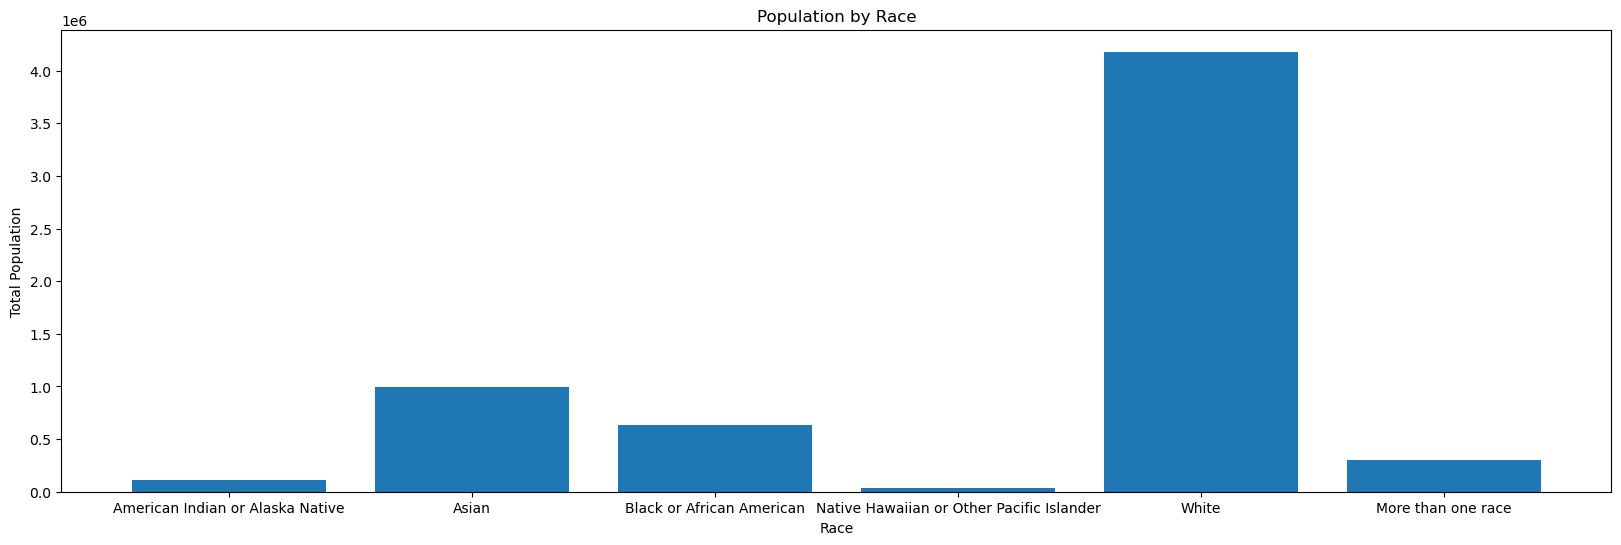

In [19]:
plt.figure(figsize=(20, 6))

plt.bar(data2['Race'], data2['Population']) 
plt.xlabel('Race')
plt.ylabel('Total Population') 
plt.title('Population by Race') 
plt.show()

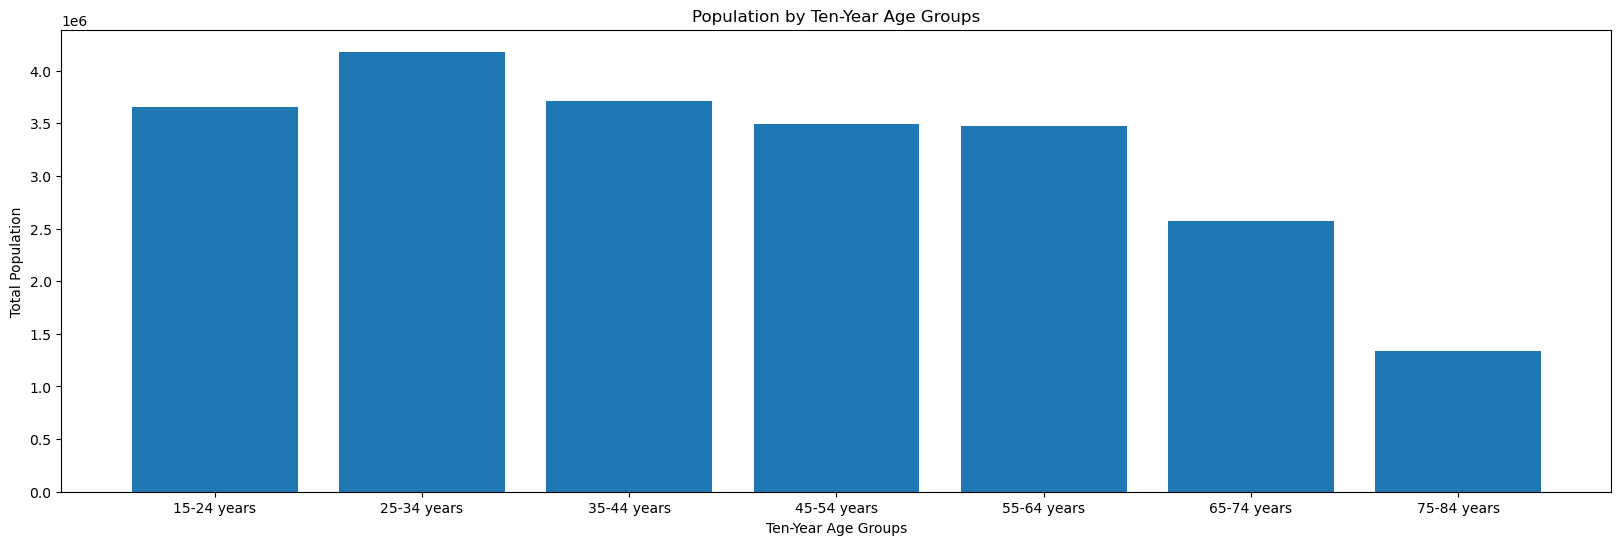

In [20]:
plt.figure(figsize=(20, 6))

plt.bar(data2['Ten-Year Age Groups'], data2['Population']) 
plt.xlabel('Ten-Year Age Groups')
plt.ylabel('Total Population') 
plt.title('Population by Ten-Year Age Groups') 
plt.show()

Save file

In [282]:
# file_path = 'data_2_v1.0.csv'
# data2.to_csv(file_path, index=False)

Population Percentage for each state

In [21]:
# Calculate the total population of each state
total_population_per_state = data2.groupby('States')['Population'].transform('sum')

# Divide the population of each row by the total population for the state of that row
data2['Population_Percentage'] = data2['Population'] / total_population_per_state * 100

In [22]:
columns_to_remove = ["Population"]

# Remove the specified columns
for column in columns_to_remove:
    if column in data2.columns:
        data2.drop(column, axis=1, inplace=True)
        print(f"Column '{column}' was removed.")
    else:
        print(f"Column '{column}' doesn't exist.")

Column 'Population' was removed.


In [23]:
pivot_df = data2.pivot_table(index=['States', 'Ten-Year Age Groups'], 
                            columns='Race', 
                            values='Population_Percentage')

# Reset index to make 'States' and 'Ten-Year Age Groups' normal columns again
data2 = pivot_df.reset_index()

In [24]:
data2

Race   States Ten-Year Age Groups  American Indian or Alaska Native     Asian  \
0     Alabama         15-24 years                          0.119604  0.272565   
1     Alabama         25-34 years                          0.121793  0.295610   
2     Alabama         35-44 years                          0.124162  0.311372   
3     Alabama         45-54 years                          0.114613  0.281604   
4     Alabama         55-64 years                          0.122685  0.198949   
..        ...                 ...                               ...       ...   
352   Wyoming         35-44 years                          0.420443  0.218032   
353   Wyoming         45-54 years                          0.362085  0.150778   
354   Wyoming         55-64 years                          0.319346  0.123877   
355   Wyoming         65-74 years                          0.211740  0.095240   
356   Wyoming         75-84 years                          0.077667  0.032325   

Race  Black or African American  More than one race  \
0                      4.887553            0.407447   
1                      5.055996            0.266886   
2                      4.251288            0.185733   
3                      3.955679            0.151510   
4                      4.165042            0.152452   
..                          ...                 ...   
352                    0.214778            0.260119   
353                    0.146222            0.195903   
354                    0.160541            0.177029   
355                    0.119972            0.116501   
356                    0.023213            0.060528   

Race  Native Hawaiian or Other Pacific Islander      White  
0                                      0.021823  10.419570  
1                                      0.022561  10.802546  
2                                      0.024063  10.289042  
3                                      0.016602  10.966431  
4                                      0.010338  12.087425  
..                                          ...        ...  
352                                    0.019742  15.252027  
353                                    0.013234  13.002721  
354                                    0.015403  15.976847  
355                                    0.007810  13.292996  
356                                    0.004773   6.081676  

[357 rows x 8 columns]

In [25]:
# Melt the data
melted_data = pd.melt(data2, 
                      id_vars=['States', 'Ten-Year Age Groups'], 
                      value_vars=['American Indian or Alaska Native', 'Asian', 'Black or African American', 'More than one race', 'Native Hawaiian or Other Pacific Islander', 'White'], 
                      var_name='Race', 
                      value_name='Population')

# Create a new column that combines 'Ten-Year Age Groups' and 'Race'
melted_data['NewCol'] = melted_data['Ten-Year Age Groups'] + "_" + melted_data['Race']

# Pivot the data
pivot_data = melted_data.pivot(index='States', columns='NewCol', values='Population').reset_index()

In [26]:
pivot_data.head()

NewCol      States  15-24 years_American Indian or Alaska Native  \
0          Alabama                                      0.119604   
1           Alaska                                      3.061055   
2          Arizona                                      1.064903   
3         Arkansas                                      0.187658   
4       California                                      0.324157   

NewCol  15-24 years_Asian  15-24 years_Black or African American  \
0                0.272565                               4.887553   
1                1.108133                               0.776600   
2                0.638799                               1.018995   
3                0.306890                               3.078945   
4                2.180818                               1.093582   

NewCol  15-24 years_More than one race  \
0                             0.407447   
1                             1.907404   
2                             0.774221   
3                             0.528782   
4                             0.954161   

NewCol  15-24 years_Native Hawaiian or Other Pacific Islander  \
0                                                0.021823       
1                                                0.330835       
2                                                0.053373       
3                                                0.090272       
4                                                0.087205       

NewCol  15-24 years_White  25-34 years_American Indian or Alaska Native  \
0               10.419570                                      0.121793   
1                9.453485                                      3.123490   
2               13.144995                                      1.093714   
3               12.480043                                      0.208206   
4               11.676304                                      0.352346   

NewCol  25-34 years_Asian  25-34 years_Black or African American  ...  \
0                0.295610                               5.055996  ...   
1                1.469139                               0.913678  ...   
2                0.800137                               1.173172  ...   
3                0.424365                               2.957997  ...   
4                3.190898                               1.402139  ...   

NewCol  65-74 years_Black or African American  65-74 years_More than one race  \
0                                    2.895874                        0.109367   
1                                    0.272237                        0.301187   
2                                    0.405655                        0.132933   
3                                    1.574083                        0.139739   
4                                    0.641428                        0.192509   

NewCol  65-74 years_Native Hawaiian or Other Pacific Islander  \
0                                                0.004711       
1                                                0.064005       
2                                                0.019162       
3                                                0.011132       
4                                                0.043125       

NewCol  65-74 years_White  75-84 years_American Indian or Alaska Native  \
0                9.955441                                      0.038323   
1                8.599278                                      0.527558   
2               12.028531                                      0.168464   
3               11.030884                                      0.045743   
4                8.225672                                      0.052484   

NewCol  75-84 years_Asian  75-84 years_Black or African American  \
0                0.053067                               1.164104   
1                0.257936                               0.084060   
2                0.159763                               0.164232   
3                0.050765                      

In [20]:
# file_path = 'data_2_v2.0.csv'
# pivot_df.to_csv(file_path, index=False)

In [27]:
data

Year      StateDesc LocationName               Category  \
0       2020        Alabama      Colbert        Health Outcomes   
1       2020        Alabama        Coosa        Health Outcomes   
2       2019        Alabama         Dale             Prevention   
3       2020        Alabama         Dale        Health Outcomes   
4       2020        Alabama       DeKalb        Health Outcomes   
...      ...            ...          ...                    ...   
188391  2019     Washington       Skagit        Health Outcomes   
188392  2020      Wisconsin       Oneida          Health Status   
188393  2020      Wisconsin       Oconto  Health Risk Behaviors   
188394  2020  West Virginia      Kanawha          Health Status   
188395  2020      Wisconsin  Fond du Lac        Health Outcomes   

                                                  Measure  \
0                  Arthritis among adults aged >=18 years   
1                  Arthritis among adults aged >=18 years   
2       Cholesterol screening among adults aged >=18 y...   
3                     Stroke among adults aged >=18 years   
4                  Arthritis among adults aged >=18 years   
...                                                   ...   
188391  High cholesterol among adults aged >=18 years ...   
188392  Mental health not good for >=14 days among adu...   
188393       Current smoking among adults aged >=18 years   
188394  Fair or poor self-rated health status among ad...   
188395            Depression among adults aged >=18 years   

                Data_Value_Type  Data_Value  TotalPopulation  \
0              Crude prevalence        34.8            55411   
1              Crude prevalence        37.8            10650   
2       Age-adjusted prevalence        86.6            48959   
3              Crude prevalence         4.2            48959   
4              Crude prevalence        36.4            71658   
...                         ...         ...              ...   
188391         Crude prevalence        34.6           130789   
188392  Age-adjusted prevalence        13.9            35751   
188393         Crude prevalence        18.1            38383   
188394  Age-adjusted prevalence        18.8           176253   
188395  Age-adjusted prevalence        20.3           102902   

                            Geolocation  
0         POINT (-87.8014569 34.703112)  
1        POINT (-86.2434818 32.9314453)  
2         POINT (-85.609476 31.4306536)  
3         POINT (-85.609476 31.4306536)  
4        POINT (-85.8040207 34.4609148)  
...                                 ...  
188391  POINT (-121.8157703 48.4932917)  
188392   POINT (-89.5345333 45.7161762)  
188393   POINT (-88.2065162 44.9965754)  
188394   POINT (-81.5235156 38.3280675)  
188395    POINT (-88.493284 43.7547219)  

[188396 rows x 9 columns]

# Exploratory Data Analysis

In [28]:
# Defining null values 1st dataset
print(data.isnull().sum())

Year               0
StateDesc          0
LocationName       0
Category           0
Measure            0
Data_Value_Type    0
Data_Value         0
TotalPopulation    0
Geolocation        0
dtype: int64


In [29]:
# Defining null values 2nd dataset
print(data2.isnull().sum())

Race
States                                       0
Ten-Year Age Groups                          0
American Indian or Alaska Native             0
Asian                                        0
Black or African American                    0
More than one race                           0
Native Hawaiian or Other Pacific Islander    0
White                                        0
dtype: int64


In [30]:
#unique values for the 1st dataset [States]
unique_values = data['StateDesc'].unique()
print(unique_values)

['Alabama' 'Alaska' 'Arizona' 'Arkansas' 'California' 'Colorado'
 'Delaware' 'Florida' 'Georgia' 'Hawaii' 'Idaho' 'Illinois' 'Indiana'
 'Iowa' 'Kansas' 'Kentucky' 'Louisiana' 'Maine' 'Massachusetts' 'Michigan'
 'Mississippi' 'Missouri' 'Montana' 'Nebraska' 'Nevada' 'New Hampshire'
 'New Jersey' 'New Mexico' 'North Carolina' 'North Dakota' 'Ohio'
 'Oklahoma' 'Oregon' 'Pennsylvania' 'Rhode Island' 'South Carolina'
 'South Dakota' 'Tennessee' 'Texas' 'Utah' 'Virginia' 'Washington'
 'West Virginia' 'Wisconsin' 'Wyoming' 'Connecticut'
 'District of Columbia' 'Minnesota' 'Maryland' 'New York' 'Vermont']


In [31]:
#unique values for the 1st dataset [City]
unique_values = data['LocationName'].unique()
print(unique_values)

['Colbert' 'Coosa' 'Dale' ... 'Vilas' 'Pacific' 'Kitsap']


In [32]:
#unique values for the 1st dataset [Category]
unique_values = data['Category'].unique()
print(unique_values)

['Health Outcomes' 'Prevention' 'Health Risk Behaviors' 'Health Status']


In [33]:
#unique values for the 1st dataset [type of diesease]
unique_values = data['Measure'].unique()
print(unique_values)

['Arthritis among adults aged >=18 years'
 'Cholesterol screening among adults aged >=18 years'
 'Stroke among adults aged >=18 years'
 'Cervical cancer screening among adult women aged 21-65 years'
 'Obesity among adults aged >=18 years'
 'Binge drinking among adults aged >=18 years'
 'Coronary heart disease among adults aged >=18 years'
 'Visits to doctor for routine checkup within the past year among adults aged >=18 years'
 'Current asthma among adults aged >=18 years'
 'All teeth lost among adults aged >=65 years'
 'High blood pressure among adults aged >=18 years'
 'Cancer (excluding skin cancer) among adults aged >=18 years'
 'Depression among adults aged >=18 years'
 'Current lack of health insurance among adults aged 18-64 years'
 'Physical health not good for >=14 days among adults aged >=18 years'
 'Chronic obstructive pulmonary disease among adults aged >=18 years'
 'Taking medicine for high blood pressure control among adults aged >=18 years with high blood pressure'
 'Dia

In [34]:
#unique values for the 1st dataset [data value type]
unique_values = data['Data_Value_Type'].unique()
print(unique_values)

['Crude prevalence' 'Age-adjusted prevalence']


In [35]:
#unique values for the 2nd dataset [States]
unique_values = data2['States'].unique()
print(unique_values)

['Alabama' 'Alaska' 'Arizona' 'Arkansas' 'California' 'Colorado'
 'Connecticut' 'Delaware' 'District of Columbia' 'Florida' 'Georgia'
 'Hawaii' 'Idaho' 'Illinois' 'Indiana' 'Iowa' 'Kansas' 'Kentucky'
 'Louisiana' 'Maine' 'Maryland' 'Massachusetts' 'Michigan' 'Minnesota'
 'Mississippi' 'Missouri' 'Montana' 'Nebraska' 'Nevada' 'New Hampshire'
 'New Jersey' 'New Mexico' 'New York' 'North Carolina' 'North Dakota'
 'Ohio' 'Oklahoma' 'Oregon' 'Pennsylvania' 'Rhode Island' 'South Carolina'
 'South Dakota' 'Tennessee' 'Texas' 'Utah' 'Vermont' 'Virginia'
 'Washington' 'West Virginia' 'Wisconsin' 'Wyoming']


In [36]:
#unique values for the 2nd dataset [Age groups]
unique_values = data2['Ten-Year Age Groups'].unique()
print(unique_values)

['15-24 years' '25-34 years' '35-44 years' '45-54 years' '55-64 years'
 '65-74 years' '75-84 years']


In [37]:
# Correlation matrix
cor_df = data[['Year', 'Data_Value', 'TotalPopulation']]
correlation_matrix = cor_df.corr()
correlation_matrix

Year  Data_Value  TotalPopulation
Year             1.000000   -0.356495         0.002114
Data_Value      -0.356495    1.000000        -0.011367
TotalPopulation  0.002114   -0.011367         1.000000

<Axes: >

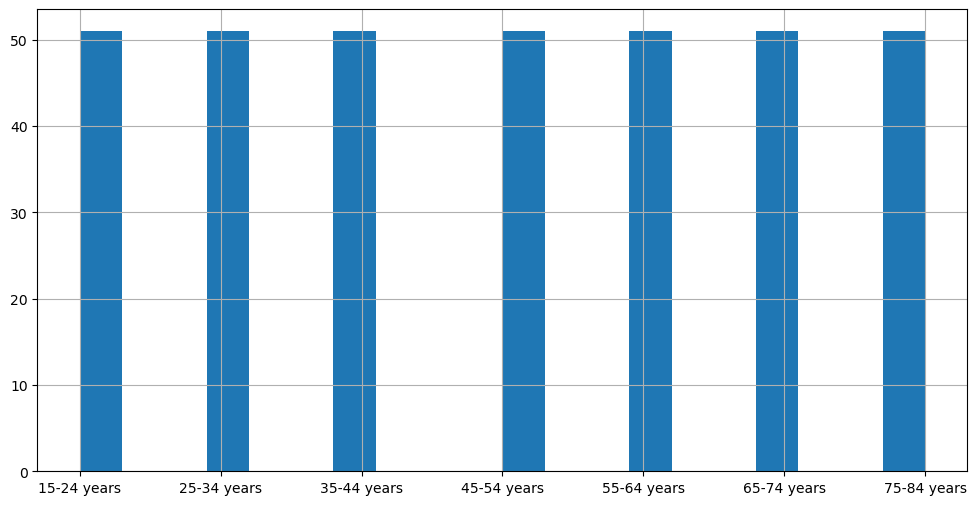

In [38]:
# Histogram of Age Groups
plt.figure(figsize=(12, 6))
# data2['Ten-Year Age Groups'].hist()
data2['Ten-Year Age Groups'].hist(bins=20)

<Axes: >

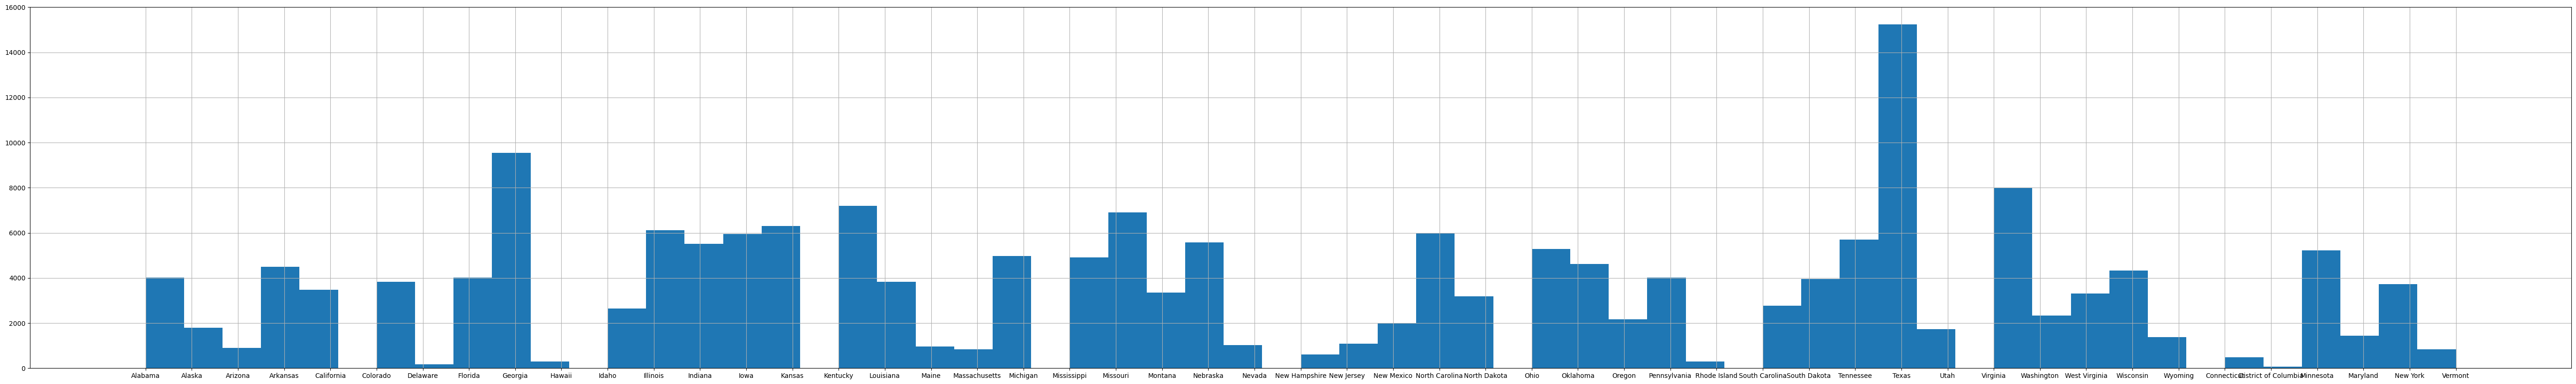

In [39]:
# 1st dtaset distribuation of states
plt.figure(figsize=(70, 10))
data['StateDesc'].hist(bins=60)

<Axes: >

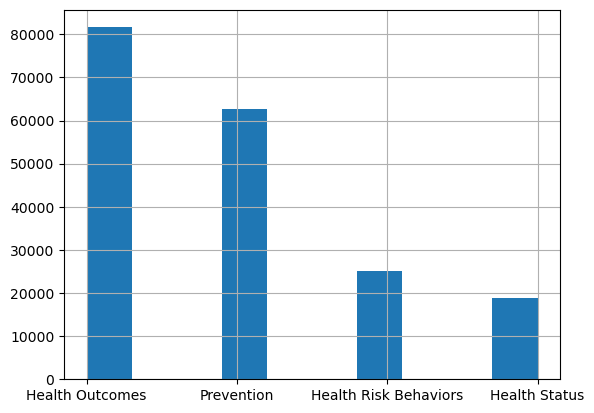

In [40]:
data['Category'].hist() 

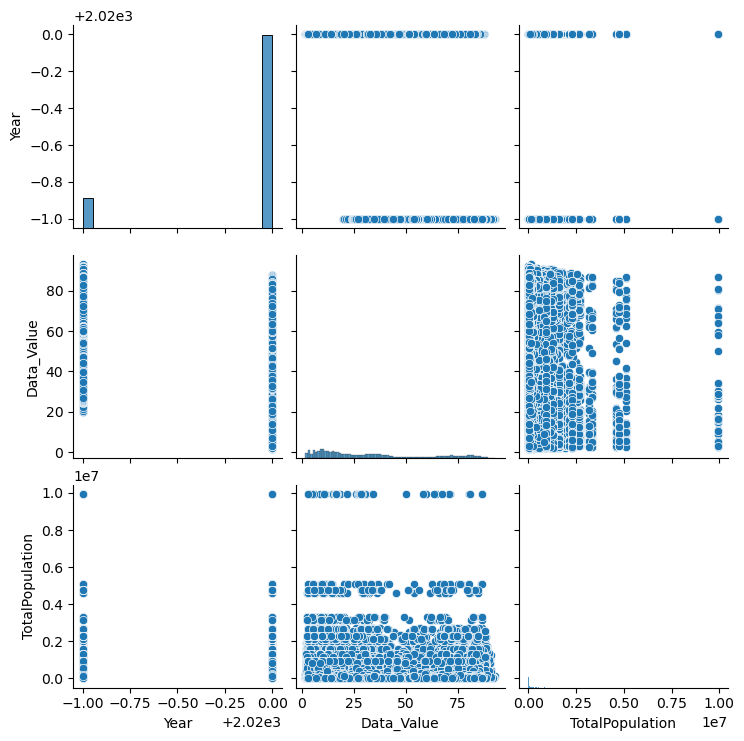

In [41]:
# First dtaset 
sns.pairplot(data)

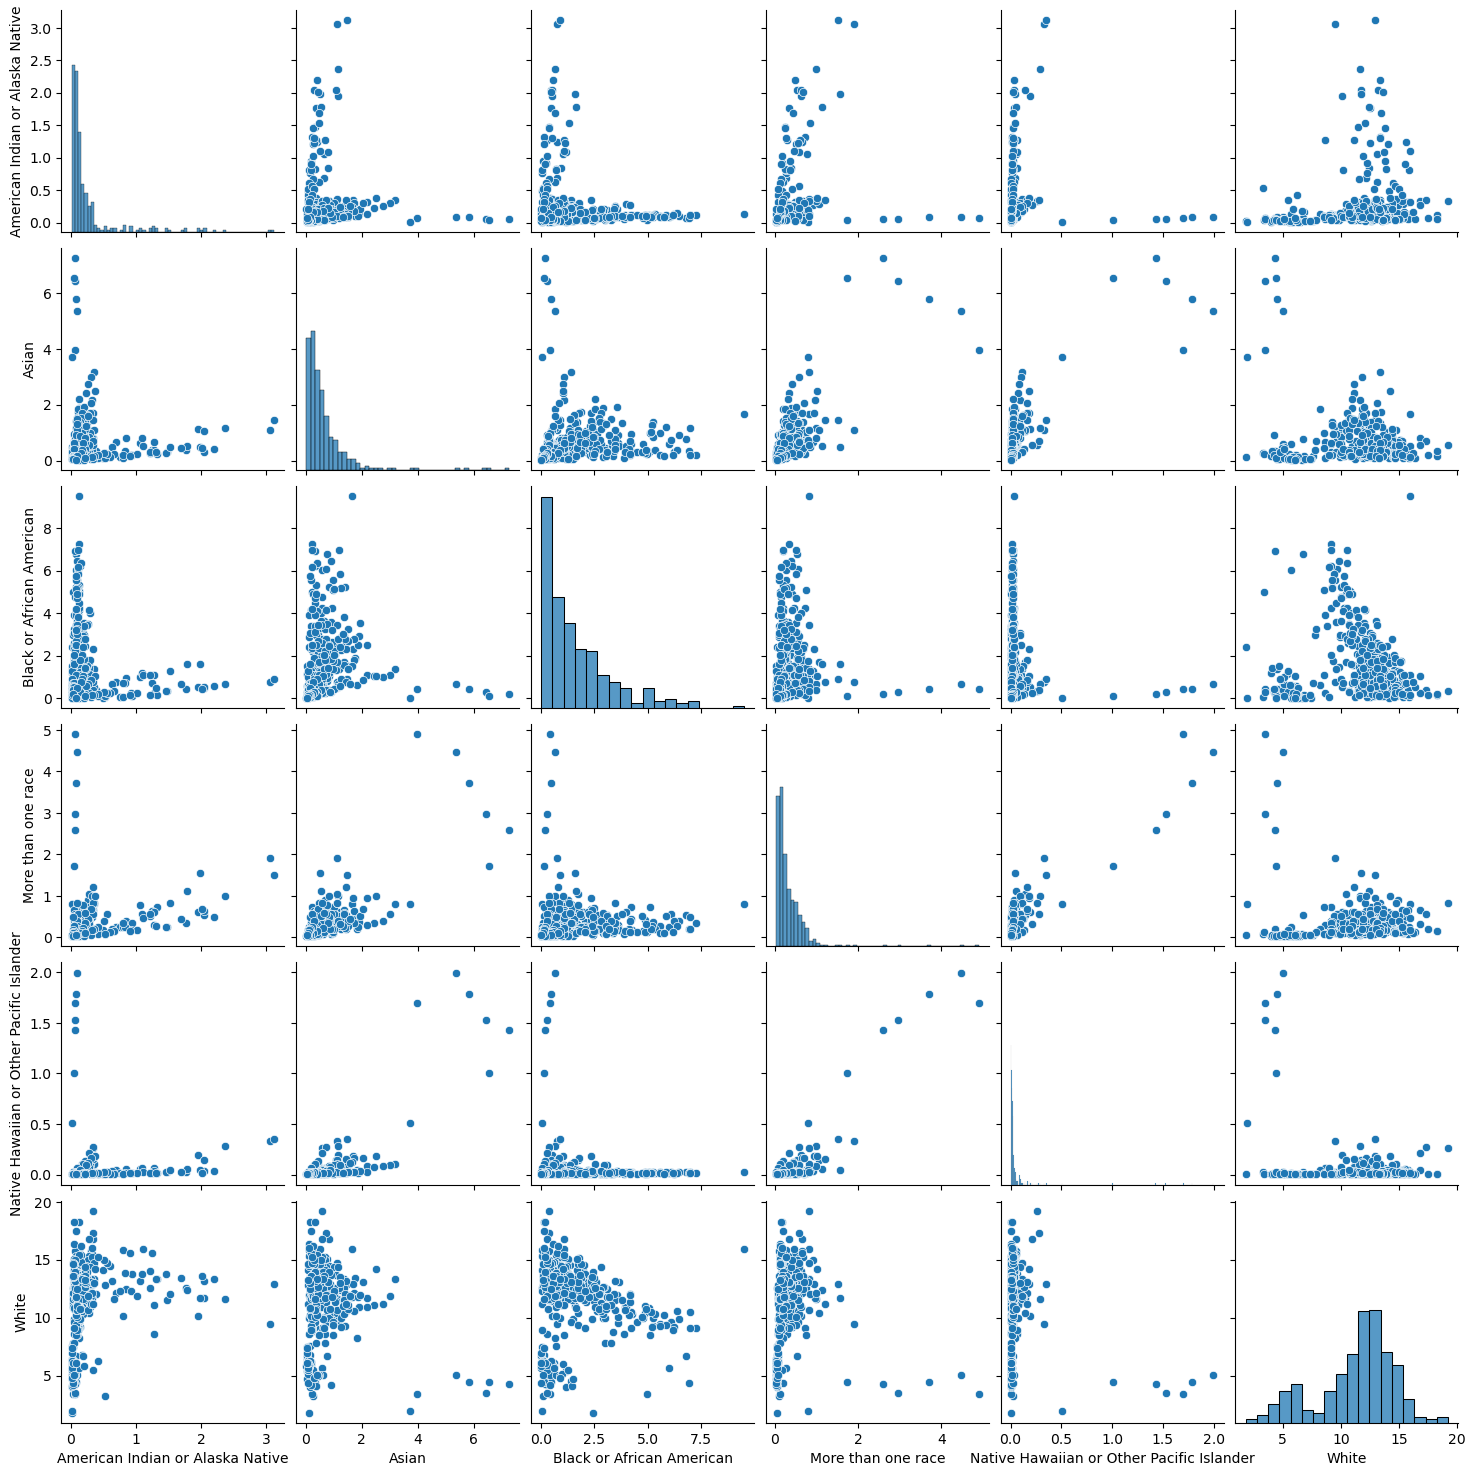

In [42]:
# second dataset
sns.pairplot(data2)

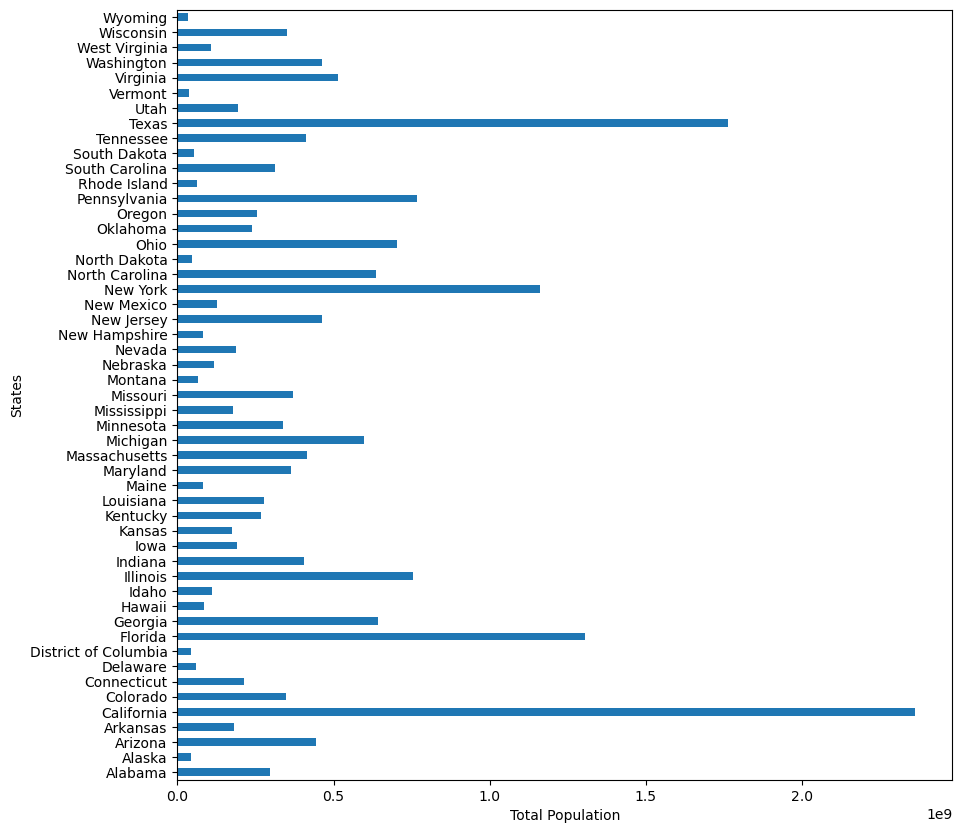

In [43]:
grouped_df = data.groupby('StateDesc')['TotalPopulation'].sum()
grouped_df.plot(kind='barh', xlabel='Total Population', ylabel='States', figsize=(10, 10))
plt.show()

# Merging Datasets

In [44]:
# Merge data and pivot_data on States
merged_data = pd.merge(data, pivot_data, left_on='StateDesc', right_on='States', how='left')
merged_data = merged_data.drop(['StateDesc'], axis=1)

In [45]:
merged_data.head()

Year LocationName         Category  \
0  2020      Colbert  Health Outcomes   
1  2020        Coosa  Health Outcomes   
2  2019         Dale       Prevention   
3  2020         Dale  Health Outcomes   
4  2020       DeKalb  Health Outcomes   

                                             Measure          Data_Value_Type  \
0             Arthritis among adults aged >=18 years         Crude prevalence   
1             Arthritis among adults aged >=18 years         Crude prevalence   
2  Cholesterol screening among adults aged >=18 y...  Age-adjusted prevalence   
3                Stroke among adults aged >=18 years         Crude prevalence   
4             Arthritis among adults aged >=18 years         Crude prevalence   

   Data_Value  TotalPopulation                     Geolocation   States  \
0        34.8            55411   POINT (-87.8014569 34.703112)  Alabama   
1        37.8            10650  POINT (-86.2434818 32.9314453)  Alabama   
2        86.6            48959   POINT (-85.609476 31.4306536)  Alabama   
3         4.2            48959   POINT (-85.609476 31.4306536)  Alabama   
4        36.4            71658  POINT (-85.8040207 34.4609148)  Alabama   

   15-24 years_American Indian or Alaska Native  ...  \
0                                      0.119604  ...   
1                                      0.119604  ...   
2                                      0.119604  ...   
3                                      0.119604  ...   
4                                      0.119604  ...   

   65-74 years_Black or African American  65-74 years_More than one race  \
0                               2.895874                        0.109367   
1                               2.895874                        0.109367   
2                               2.895874                        0.109367   
3                               2.895874                        0.109367   
4                               2.895874                        0.109367   

   65-74 years_Native Hawaiian or Other Pacific Islander  65-74 years_White  \
0                                           0.004711               9.955441   
1                                           0.004711               9.955441   
2                                           0.004711               9.955441   
3                                           0.004711               9.955441   
4                                           0.004711               9.955441   

   75-84 years_American Indian or Alaska Native  75-84 years_Asian  \
0                                      0.038323           0.053067   
1                                      0.038323           0.053067   
2                                      0.038323           0.053067   
3                                      0.038323           0.053067   
4                                      0.038323           0.053067   

   75-84 years_Black or African American  75-84 years_More than one race  \
0                               1.164104                        0.053678   
1                               1.164104                        0.053678   
2                               1.164104                        0.053678   
3                               1.164104                        0.053678   
4                               1.164104                        0.053678   

   75-84 years_Native Hawaiian or Other Pacific Islander  75-84 years_White  
0                                           0.002088               5.402737  
1                                           0.002088               5.402737  
2                                           0.002088               5.402737  
3                                           0.002088               5.402737  
4                                           0.002088               5.402737  

[5 rows x 51 columns]

extract the x and y coordinates from the Geolocation feature

In [46]:
# Define a regex pattern to extract x and y coordinates
pattern = r"POINT \((-?\d+\.\d+) (-?\d+\.\d+)\)"

# Use str.extract to extract the coordinates
coordinates = merged_data["Geolocation"].str.extract(pattern)

# Create new features 'x' and 'y' in the dataframe
merged_data["x"] = coordinates[0]
merged_data["y"] = coordinates[1]

# Convert 'x' and 'y' to float for numeric operations
merged_data["x"] = merged_data["x"].astype(float)
merged_data["y"] = merged_data["y"].astype(float)

merged_data = merged_data.drop(['Geolocation'], axis=1)

Droping LocationName and States

In [47]:
merged_data = merged_data.drop(['States', 'LocationName'], axis=1)

In [48]:
merged_data.head()

Year         Category                                            Measure  \
0  2020  Health Outcomes             Arthritis among adults aged >=18 years   
1  2020  Health Outcomes             Arthritis among adults aged >=18 years   
2  2019       Prevention  Cholesterol screening among adults aged >=18 y...   
3  2020  Health Outcomes                Stroke among adults aged >=18 years   
4  2020  Health Outcomes             Arthritis among adults aged >=18 years   

           Data_Value_Type  Data_Value  TotalPopulation  \
0         Crude prevalence        34.8            55411   
1         Crude prevalence        37.8            10650   
2  Age-adjusted prevalence        86.6            48959   
3         Crude prevalence         4.2            48959   
4         Crude prevalence        36.4            71658   

   15-24 years_American Indian or Alaska Native  15-24 years_Asian  \
0                                      0.119604           0.272565   
1                                      0.119604           0.272565   
2                                      0.119604           0.272565   
3                                      0.119604           0.272565   
4                                      0.119604           0.272565   

   15-24 years_Black or African American  15-24 years_More than one race  ...  \
0                               4.887553                        0.407447  ...   
1                               4.887553                        0.407447  ...   
2                               4.887553                        0.407447  ...   
3                               4.887553                        0.407447  ...   
4                               4.887553                        0.407447  ...   

   65-74 years_Native Hawaiian or Other Pacific Islander  65-74 years_White  \
0                                           0.004711               9.955441   
1                                           0.004711               9.955441   
2                                           0.004711               9.955441   
3                                           0.004711               9.955441   
4                                           0.004711               9.955441   

   75-84 years_American Indian or Alaska Native  75-84 years_Asian  \
0                                      0.038323           0.053067   
1                                      0.038323           0.053067   
2                                      0.038323           0.053067   
3                                      0.038323           0.053067   
4                                      0.038323           0.053067   

   75-84 years_Black or African American  75-84 years_More than one race  \
0                               1.164104                        0.053678   
1                               1.164104                        0.053678   
2                               1.164104                        0.053678   
3                               1.164104                        0.053678   
4                               1.164104                        0.053678   

   75-84 years_Native Hawaiian or Other Pacific Islander  75-84 years_White  \
0                                           0.002088               5.402737   
1                                           0.002088               5.402737   
2                                           0.002088               5.402737   
3                                           0.002088               5.402737   
4                                           0.002088               5.402737   

           x          y  
0 -87.801457  34.703112  
1 -86.243482  32.931445  
2 -85.609476  31.430654  
3 -85.609476  31.430654  
4 -85.804021  34.460915  

[5 rows x 50 columns]

In [49]:
merged_data.columns

Index(['Year', 'Category', 'Measure', 'Data_Value_Type', 'Data_Value',
       'TotalPopulation', '15-24 years_American Indian or Alaska Native',
       '15-24 years_Asian', '15-24 years_Black or African American',
       '15-24 years_More than one race',
       '15-24 years_Native Hawaiian or Other Pacific Islander',
       '15-24 years_White', '25-34 years_American Indian or Alaska Native',
       '25-34 years_Asian', '25-34 years_Black or African American',
       '25-34 years_More than one race',
       '25-34 years_Native Hawaiian or Other Pacific Islander',
       '25-34 years_White', '35-44 years_American Indian or Alaska Native',
       '35-44 years_Asian', '35-44 years_Black or African American',
       '35-44 years_More than one race',
       '35-44 years_Native Hawaiian or Other Pacific Islander',
       '35-44 years_White', '45-54 years_American Indian or Alaska Native',
       '45-54 years_Asian', '45-54 years_Black or African American',
       '45-54 years_More than one ra

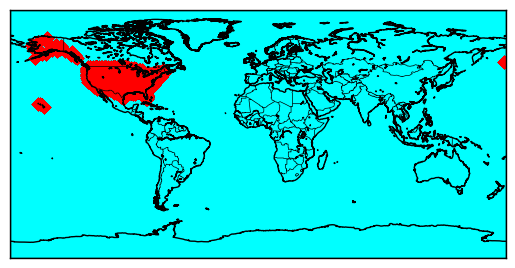

<Figure size 2000x2000 with 0 Axes>

In [50]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

# create a map
m = Basemap(projection='cyl', resolution='l')

m.drawcoastlines()
m.drawcountries()
m.drawmapboundary(fill_color='aqua')

# plot points
x, y = m(merged_data['x'], merged_data['y'])  # convert the coordinates into map scales
m.scatter(x, y, marker='D',color='r')

plt.figure(figsize=(20, 20))
plt.show()

In [53]:
merged_data.columns[6:-2]

Index(['15-24 years_American Indian or Alaska Native', '15-24 years_Asian',
       '15-24 years_Black or African American',
       '15-24 years_More than one race',
       '15-24 years_Native Hawaiian or Other Pacific Islander',
       '15-24 years_White', '25-34 years_American Indian or Alaska Native',
       '25-34 years_Asian', '25-34 years_Black or African American',
       '25-34 years_More than one race',
       '25-34 years_Native Hawaiian or Other Pacific Islander',
       '25-34 years_White', '35-44 years_American Indian or Alaska Native',
       '35-44 years_Asian', '35-44 years_Black or African American',
       '35-44 years_More than one race',
       '35-44 years_Native Hawaiian or Other Pacific Islander',
       '35-44 years_White', '45-54 years_American Indian or Alaska Native',
       '45-54 years_Asian', '45-54 years_Black or African American',
       '45-54 years_More than one race',
       '45-54 years_Native Hawaiian or Other Pacific Islander',
       '45-54 years_W

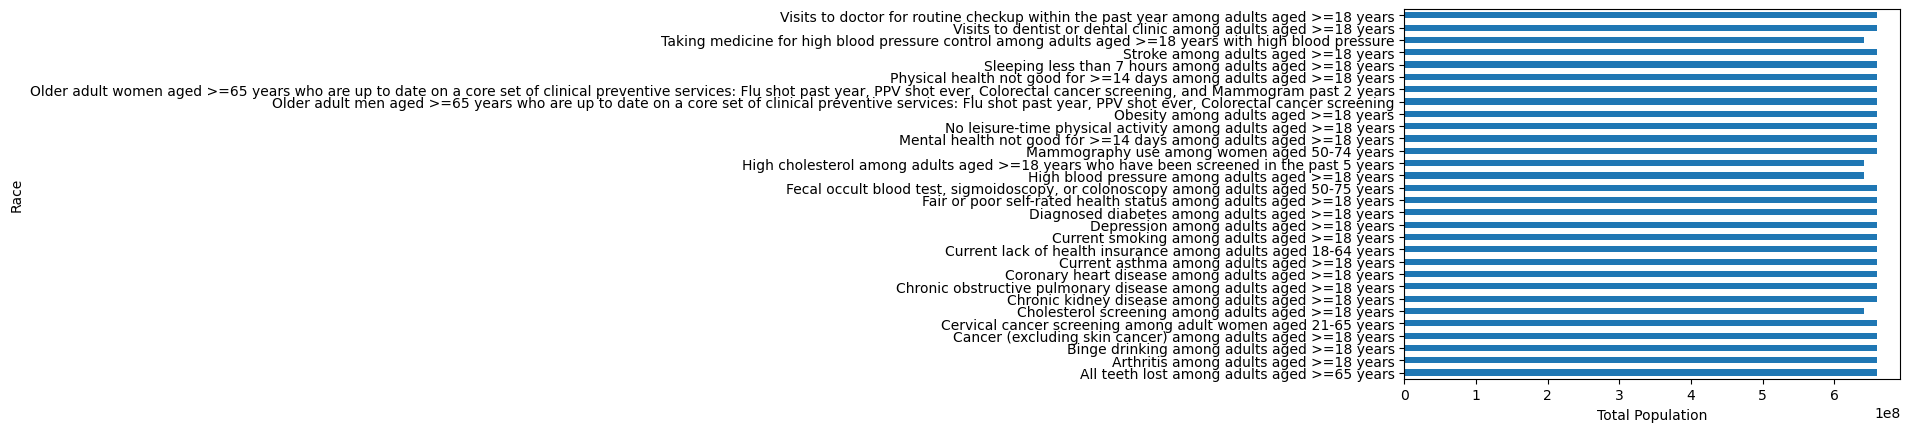

In [54]:
grouped_df = merged_data.groupby('Measure')['TotalPopulation'].sum()
grouped_df.plot(kind='barh', xlabel='Total Population', ylabel='Race')
plt.show()

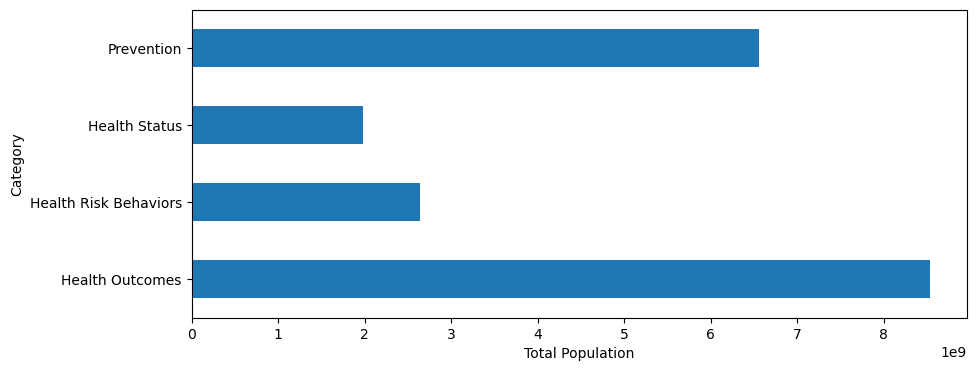

In [55]:
grouped_df = merged_data.groupby('Category')['TotalPopulation'].sum()
grouped_df.plot(kind='barh', xlabel='Total Population', ylabel='Category', figsize=(10, 4))
plt.show()

In [56]:
# file_path = 'merged_v1.1.csv'
# merged_data.to_csv(file_path, index=False)

In [ ]:
import folium
from folium.plugins import HeatMap

In [ ]:
df = pd.read_csv('merged_v1.2.csv')
m = folium.Map(location=[df.Latitude.mean(), df.Longitude.mean()], zoom_start=10, control_scale=True)

# Add points to the map instance
df['Latitude'] = df['Latitude'].astype(float)
df['Longitude'] = df['Longitude'].astype(float)
heat_data = [[row['Latitude'],row['Longitude']] for index, row in df.iterrows()]

# Plot it on the map
HeatMap(heat_data).add_to(m)

# Display the map
m

# Training

In [57]:
df = pd.read_csv('merged_v1.1.csv')

In [60]:
df.head()

Year         Category                                            Measure  \
0  2020  Health Outcomes             Arthritis among adults aged >=18 years   
1  2020  Health Outcomes             Arthritis among adults aged >=18 years   
2  2019       Prevention  Cholesterol screening among adults aged >=18 y...   
3  2020  Health Outcomes                Stroke among adults aged >=18 years   
4  2020  Health Outcomes             Arthritis among adults aged >=18 years   

           Data_Value_Type  Data_Value  TotalPopulation  \
0         Crude prevalence        34.8            55411   
1         Crude prevalence        37.8            10650   
2  Age-adjusted prevalence        86.6            48959   
3         Crude prevalence         4.2            48959   
4         Crude prevalence        36.4            71658   

   15-24 years_American Indian or Alaska Native  15-24 years_Asian  \
0                                      0.119604           0.272565   
1                                      0.119604           0.272565   
2                                      0.119604           0.272565   
3                                      0.119604           0.272565   
4                                      0.119604           0.272565   

   15-24 years_Black or African American  15-24 years_More than one race  ...  \
0                               4.887553                        0.407447  ...   
1                               4.887553                        0.407447  ...   
2                               4.887553                        0.407447  ...   
3                               4.887553                        0.407447  ...   
4                               4.887553                        0.407447  ...   

   65-74 years_Native Hawaiian or Other Pacific Islander  65-74 years_White  \
0                                           0.004711               9.955441   
1                                           0.004711               9.955441   
2                                           0.004711               9.955441   
3                                           0.004711               9.955441   
4                                           0.004711               9.955441   

   75-84 years_American Indian or Alaska Native  75-84 years_Asian  \
0                                      0.038323           0.053067   
1                                      0.038323           0.053067   
2                                      0.038323           0.053067   
3                                      0.038323           0.053067   
4                                      0.038323           0.053067   

   75-84 years_Black or African American  75-84 years_More than one race  \
0                               1.164104                        0.053678   
1                               1.164104                        0.053678   
2                               1.164104                        0.053678   
3                               1.164104                        0.053678   
4                               1.164104                        0.053678   

   75-84 years_Native Hawaiian or Other Pacific Islander  75-84 years_White  \
0                                           0.002088               5.402737   
1                                           0.002088               5.402737   
2                                           0.002088               5.402737   
3                                           0.002088               5.402737   
4                                           0.002088               5.402737   

           x          y  
0 -87.801457  34.703112  
1 -86.243482  32.931445  
2 -85.609476  31.430654  
3 -85.609476  31.430654  
4 -85.804021  34.460915  

[5 rows x 50 columns]

## Random Forest

In [63]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [67]:
df = pd.read_csv('merged_v1.1.csv')

# drop the 'Data_Value_Type' column
df = df.drop(columns=['Data_Value_Type'])

df = pd.get_dummies(df)

# set 'Data_Value' as target
y = df['Data_Value']

# use all other features as input
X = df.drop(columns=['Data_Value'])

# split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# train a RandomForestRegressor model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# make predictions on the test set
y_pred = model.predict(X_test)

# calculate and print metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False) # if `squared=False` returns Root Mean Square Error (RMSE)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Square Error (RMSE): {rmse}")
print(f"R2 Score: {r2}")

Mean Absolute Error (MAE): 1.9668729906453832
Mean Squared Error (MSE): 12.153219166361595
Root Mean Square Error (RMSE): 3.4861467505487482
R2 Score: 0.9809977617286781


Mean Absolute Error (MAE): 1.9663135232796958
Mean Squared Error (MSE): 12.170397941374205
Root Mean Square Error (RMSE): 3.488609743346797
R2 Score: 0.9809709017526067

## RF Feature Importance

In [132]:
df = pd.read_csv('merged_v1.2.csv')

df = df.drop(columns=['Data_Value_Type'])

for col in df.columns:
    if df[col].dtype == 'object':
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])

y = df['Data_Value']
X = df.drop(columns=['Data_Value'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

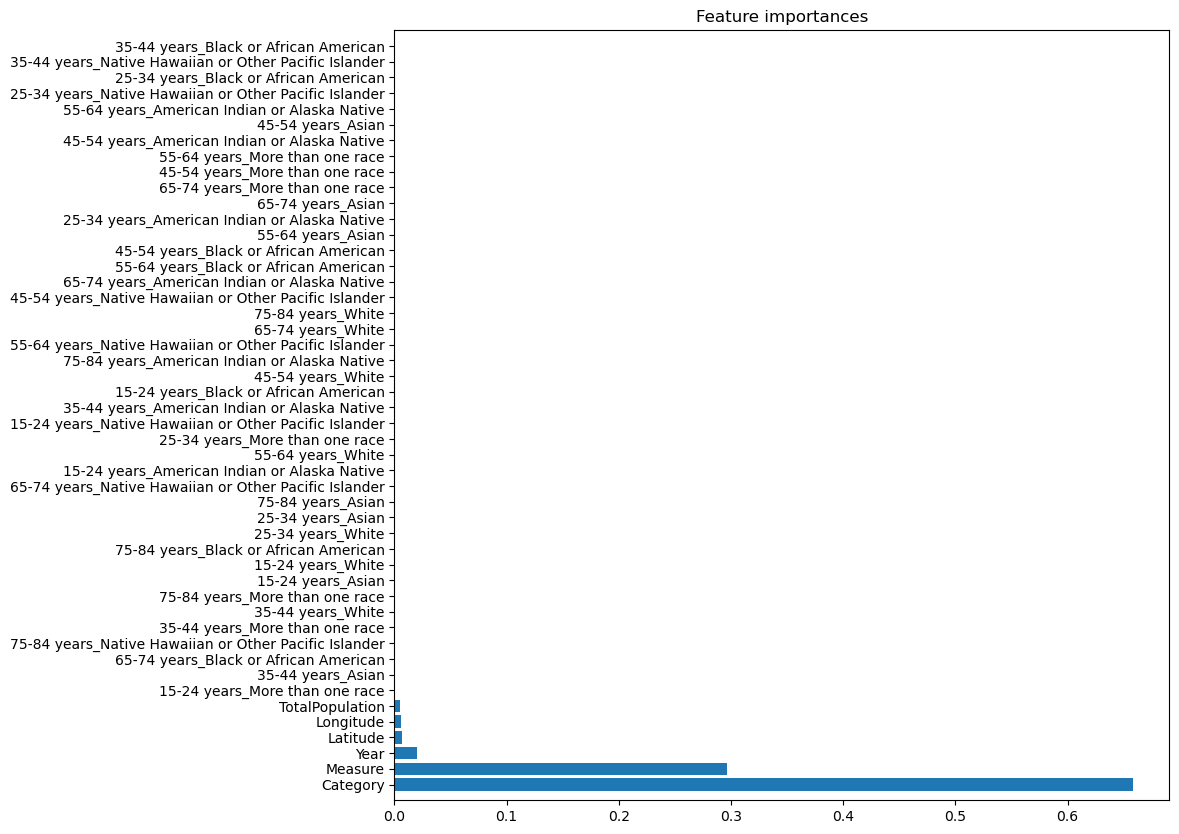

In [134]:
model = RandomForestRegressor(random_state=0)
model.fit(X_train, y_train)

importances = model.feature_importances_
feature_names = X.columns

# sort the feature importances in descending order
indices = np.argsort(importances)[::-1]

# plot the feature importances
plt.figure(figsize=(10, 10))
plt.title("Feature importances")
plt.barh(range(X.shape[1]), importances[indices], align="center")
plt.yticks(range(X.shape[1]), [feature_names[i] for i in indices])
plt.ylim([-1, X.shape[1]])
plt.show()

## RF (Exclude Measure, Category and Year)

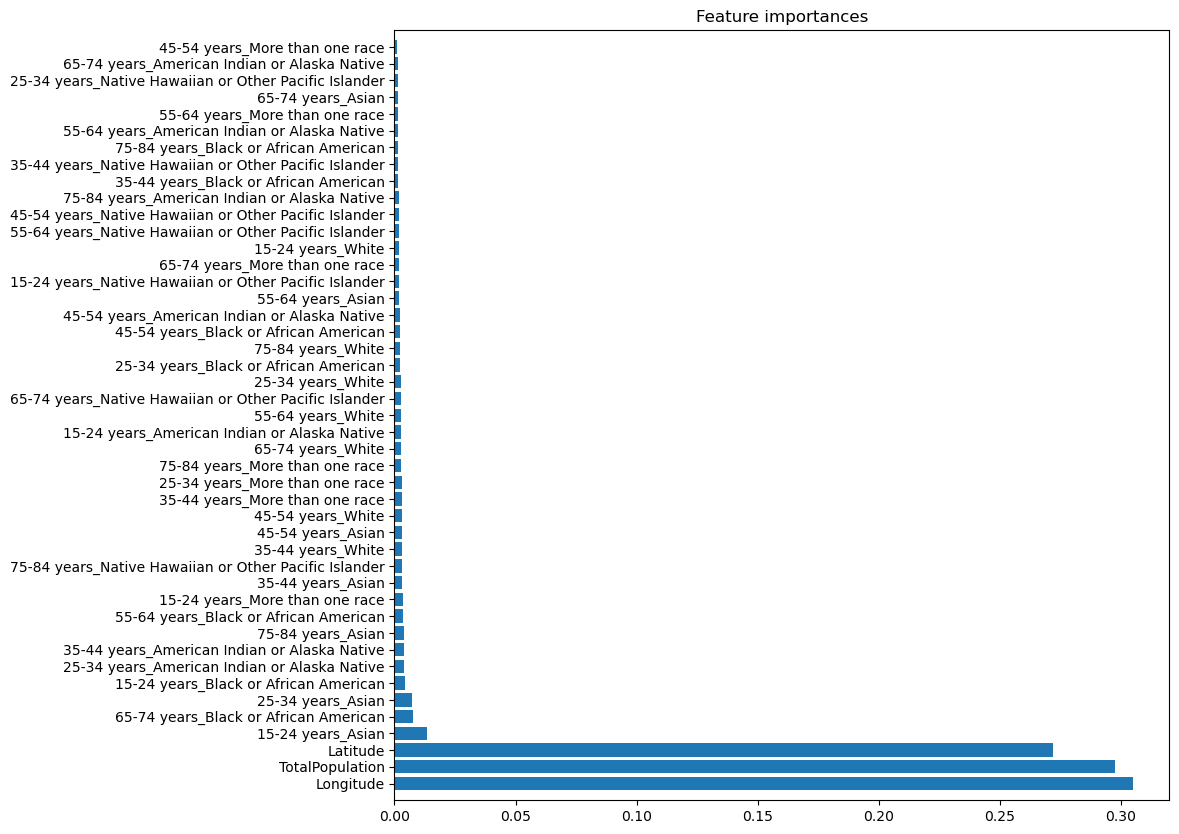

In [135]:
df = pd.read_csv('merged_v1.2.csv')
df = df.drop(columns=['Data_Value_Type', 'Category', 'Measure', 'Year'])

for col in df.columns:
    if df[col].dtype == 'object':
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])

y = df['Data_Value']
X = df.drop(columns=['Data_Value'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

importances = model.feature_importances_
feature_names = X.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 10))
plt.title("Feature importances")
plt.barh(range(X.shape[1]), importances[indices], align="center")
plt.yticks(range(X.shape[1]), [feature_names[i] for i in indices])
plt.ylim([-1, X.shape[1]])
plt.show()

## RF Only Important Features

In [137]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

df = pd.read_csv('merged_v1.2.csv')
df = df.drop(columns=['Data_Value_Type'])
df = df[['Category', 'Measure', 'Longitude', 'Latitude', 'Data_Value']]

df = pd.get_dummies(df)
y = df['Data_Value']
X = df.drop(columns=['Data_Value'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False) # if `squared=False` returns Root Mean Square Error (RMSE)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Square Error (RMSE): {rmse}")
print(f"R2 Score: {r2}")

Mean Absolute Error (MAE): 2.0048253899665447
Mean Squared Error (MSE): 12.38270672738374
Root Mean Square Error (RMSE): 3.5189070359109715
R2 Score: 0.9806389450846965


## AutoML

In [138]:
from tpot import TPOTRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv('merged_v1.2.csv')
df = df.drop(columns=['Data_Value_Type'])
df = df[['Category', 'Measure', 'Longitude', 'Latitude', 'Data_Value']]

df = pd.get_dummies(df)
y = df['Data_Value']
X = df.drop(columns=['Data_Value'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

tpot = TPOTRegressor(generations=5, population_size=50, verbosity=2, random_state=42)

tpot.fit(X_train, y_train)

print(tpot.fitted_pipeline_)
print(tpot.score(X_test, y_test))

                                                                                   
Best pipeline: RandomForestRegressor(ElasticNetCV(input_matrix, l1_ratio=0.75, tol=0.01), bootstrap=False, max_features=0.4, min_samples_leaf=16, min_samples_split=14, n_estimators=100)
Pipeline(steps=[('stackingestimator',
                 StackingEstimator(estimator=ElasticNetCV(l1_ratio=0.75,
                                                          random_state=42,
                                                          tol=0.01))),
                ('randomforestregressor',
                 RandomForestRegressor(bootstrap=False, max_features=0.4,
                                       min_samples_leaf=16,
                                       min_samples_split=14,
                                       random_state=42))])


/home/mehanton/anaconda3/envs/experimental/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but ElasticNetCV was fitted with feature names
  warnings.warn(


-9.568602119917722


## DNN

In [79]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

Data Preprocessing

In [80]:
df = pd.read_csv('merged_v1.1.csv')

df = df[['Category', 'Measure', 'x', 'y', 'Data_Value']]
df = pd.get_dummies(df)

y = df['Data_Value']
X = df.drop(columns=['Data_Value'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [81]:
last_columns = merged_data.iloc[:, -44:]
combined_df = pd.concat([df, last_columns], axis=1)
df

x          y  Data_Value  Category_Health Outcomes  \
0       -87.801457  34.703112        34.8                      True   
1       -86.243482  32.931445        37.8                      True   
2       -85.609476  31.430654        86.6                     False   
3       -85.609476  31.430654         4.2                      True   
4       -85.804021  34.460915        36.4                      True   
...            ...        ...         ...                       ...   
188391 -121.815770  48.493292        34.6                      True   
188392  -89.534533  45.716176        13.9                     False   
188393  -88.206516  44.996575        18.1                     False   
188394  -81.523516  38.328068        18.8                     False   
188395  -88.493284  43.754722        20.3                      True   

        Category_Health Risk Behaviors  Category_Health Status  \
0                                False                   False   
1                                False                   False   
2                                False                   False   
3                                False                   False   
4                                False                   False   
...                                ...                     ...   
188391                           False                   False   
188392                           False                    True   
188393                            True                   False   
188394                           False                    True   
188395                           False                   False   

        Category_Prevention  \
0                     False   
1                     False   
2                      True   
3                     False   
4                     False   
...                     ...   
188391                False   
188392                False   
188393                False   
188394                False   
188395                False   

        Measure_All teeth lost among adults aged >=65 years  \
0                                                   False     
1                                                   False     
2                                                   False     
3                                                   False     
4                                                   False     
...                                                   ...     
188391                                              False     
188392                                              False     
188393                                              False     
188394                                              False     
188395                                              False     

        Measure_Arthritis among adults aged >=18 years  \
0                                                 True   
1                                                 True   
2                                                False   
3                                                False   
4                                                 True   
...                                                ...   
188391                                           False   
188392                                           False   
188393                                           False   
188394                                           False   
188395                                           False   

        Measure_Binge drinking among adults aged >=18 years  ...  \
0                                                   False    ...   
1                                                   False    ...   
2                                                   False    ...   
3                                                   False    ...   
4                                                   False    ...   
...                                                   ...    ...   
188391                                              False    ...   


DNN Architecture

In [82]:
# Dataset
class MyDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X.astype(float).values, dtype=torch.float32)
        self.y = torch.tensor(y.values, dtype=torch.float32)
    
    def __len__(self):
        return len(self.X)
    
    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

# Model
class MyModel(nn.Module):
    def __init__(self, input_size):
        super(MyModel, self).__init__()
        self.fc1 = nn.Linear(input_size, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

Complex DNN Architecture

In [146]:
class MyModel(nn.Module):
    def __init__(self, input_size):
        super(MyModel, self).__init__()
        self.fc1 = nn.Linear(input_size, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 32)
        self.fc5 = nn.Linear(32, 1)
        self.leakyrelu = nn.LeakyReLU()

    def forward(self, x):
        x = self.leakyrelu(self.fc1(x))
        x = self.leakyrelu(self.fc2(x))
        x = self.leakyrelu(self.fc3(x))
        x = self.leakyrelu(self.fc4(x))
        x = self.fc5(x)
        return x


Parameter Configuration

In [84]:
y = df['Data_Value']
X = df.drop(columns=['Data_Value'])

epochs = 300

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

input_size = X_train.shape[1]
model = MyModel(input_size)
dataset = MyDataset(X_train, y_train)

# GPU if available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device = torch.device('cuda')
model = model.to(device)
# dataset = dataset.to(device)

# DataLoader to handle batching of data
data_loader = DataLoader(dataset, batch_size=128, shuffle=True)

# Loss function and Optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.0005)

Training

In [85]:
epoch_losses = []  # list to store the training losses

# Training loop
for epoch in range(epochs):
    running_loss = 0.0  # running loss for each epoch
    
    for i, data in enumerate(data_loader, 0):  # iterate over each batch of the data loader
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # move the inputs and labels to the device
        inputs = inputs.to(device)
        labels = labels.to(device)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = model(inputs)
        loss = criterion(outputs, labels.unsqueeze(1))
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * inputs.size(0)  # loss for the current batch
    
    epoch_loss = running_loss / len(dataset)  # average loss for the epoch
    epoch_losses.append(epoch_loss)  # epoch loss in the list

    print('Epoch', epoch, 'loss:', epoch_loss)

Epoch 0 loss: 347.77267831333467
Epoch 1 loss: 24.831776944020266
Epoch 2 loss: 18.554023782463887
Epoch 3 loss: 17.18668227751432
Epoch 4 loss: 16.64619908129961
Epoch 5 loss: 16.491161706452093
Epoch 6 loss: 16.372049118854356
Epoch 7 loss: 16.163337821669884
Epoch 8 loss: 16.217141054666182
Epoch 9 loss: 16.048812184700424
Epoch 10 loss: 16.016682554985227
Epoch 11 loss: 15.977714034389066
Epoch 12 loss: 15.878459594043381
Epoch 13 loss: 15.788227876807833
Epoch 14 loss: 15.763298653636237
Epoch 15 loss: 15.706471760898971
Epoch 16 loss: 15.500159185882296
Epoch 17 loss: 15.55823580567417
Epoch 18 loss: 15.51316659861004
Epoch 19 loss: 15.450796068472425
Epoch 20 loss: 15.38904524627785
Epoch 21 loss: 15.290661837063181
Epoch 22 loss: 15.152195481599247
Epoch 23 loss: 15.178567019872894
Epoch 24 loss: 15.102864166047562
Epoch 25 loss: 15.034672420639094
Epoch 26 loss: 15.002064084129705
Epoch 27 loss: 14.87846599337294
Epoch 28 loss: 14.857184514551648
Epoch 29 loss: 14.767637810549

training loss

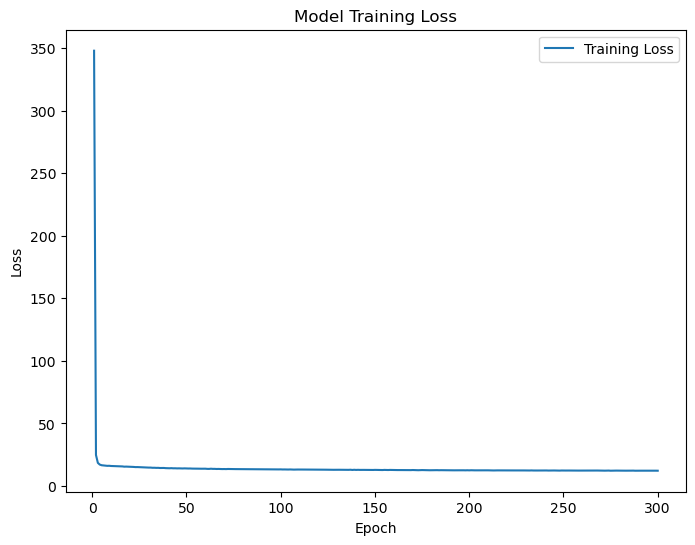

In [87]:
plt.figure(figsize=(8, 6))
plt.plot(range(1, epochs+1), epoch_losses, label='Training Loss')
plt.title('Model Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

prediction (first hundred samples)

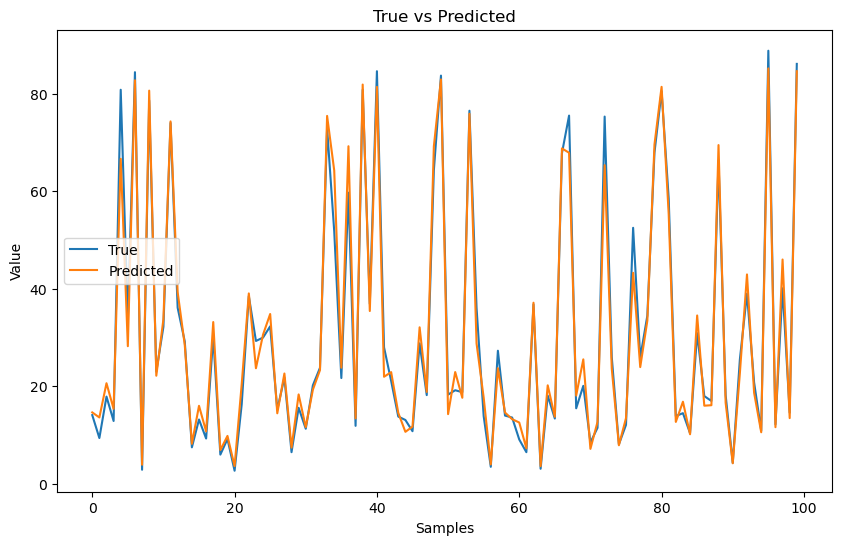

In [103]:
model.eval()
test_inputs = torch.tensor(X_test.iloc[:100].values.astype(float)).to(device)
with torch.no_grad():
    predictions = model(test_inputs.to(torch.float32)).cpu().numpy()

plt.figure(figsize=(10, 6))

plt.plot(y_test.iloc[:100].values, label='True')
plt.plot(predictions, label='Predicted')

plt.title('True vs Predicted')
plt.xlabel('Samples')
plt.ylabel('Value')
plt.legend()
plt.show()

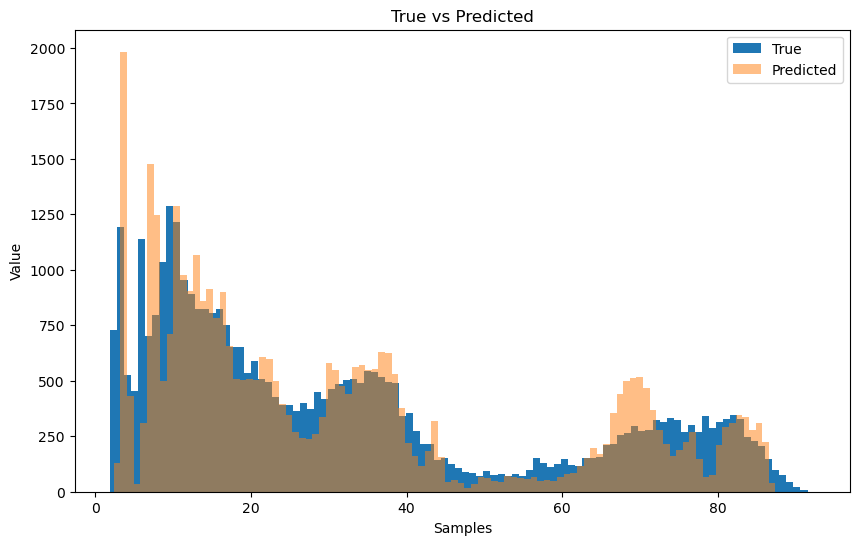

In [109]:
model.eval()
test_inputs = torch.tensor(X_test.values.astype(float)).to(device)
with torch.no_grad():
    predictions = model(test_inputs.to(torch.float32)).cpu().numpy()

plt.figure(figsize=(10, 6))

plt.hist(y_test.values, label='True', bins=100)
plt.hist(predictions, label='Predicted', bins=100, alpha=0.5)

plt.title('True vs Predicted')
plt.xlabel('Samples')
plt.ylabel('Value')
plt.legend()
plt.show()

In [112]:
model.eval()
test_inputs = torch.tensor(X_test.values.astype(float)).to(device)
with torch.no_grad():
    predictions = model(test_inputs.to(torch.float32)).cpu().numpy()

mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print("Mean Squared Error (MSE):", mse)
print("R-squared (R2):", r2)

Mean Squared Error (MSE): 12.080636051574318
R-squared (R2): 0.9811112494904624


## Complicated DNN Architecture

In [113]:
df = pd.read_csv('merged_v1.1.csv')

df = df[['Category', 'Measure', 'x', 'y', 'Data_Value']]
df = pd.get_dummies(df)

y = df['Data_Value']
X = df.drop(columns=['Data_Value'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Complex DNN Architecture

In [115]:
class MyModel(nn.Module):
    def __init__(self, input_size):
        super(MyModel, self).__init__()
        self.fc1 = nn.Linear(input_size, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 32)
        self.fc4 = nn.Linear(32, 16)
        self.fc5 = nn.Linear(16, 1)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.relu(self.fc3(x))
        x = self.relu(self.fc4(x))
        x = self.fc5(x)
        return x

Parameter Configuration

In [116]:
y = df['Data_Value']
X = df.drop(columns=['Data_Value'])

epochs = 500

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

input_size = X_train.shape[1]
model = MyModel(input_size)
dataset = MyDataset(X_train, y_train)

# GPU if available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device = torch.device('cuda')
model = model.to(device)

# DataLoader to handle batching of data
data_loader = DataLoader(dataset, batch_size=128, shuffle=True)

# Loss function and Optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.0005)

Training

In [117]:
epoch_losses = []  # list to store the training losses

# Training loop
for epoch in range(epochs):
    running_loss = 0.0  # running loss for each epoch
    
    for i, data in enumerate(data_loader, 0):  # iterate over each batch of the data loader
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # move the inputs and labels to the device
        inputs = inputs.to(device)
        labels = labels.to(device)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = model(inputs)
        loss = criterion(outputs, labels.unsqueeze(1))
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * inputs.size(0)  # loss for the current batch
    
    epoch_loss = running_loss / len(dataset)  # average loss for the epoch
    epoch_losses.append(epoch_loss)  # epoch loss in the list

    print('Epoch', epoch, 'loss:', epoch_loss)

Epoch 0 loss: 324.3527020631302
Epoch 1 loss: 21.95292805733171
Epoch 2 loss: 18.443452100496376
Epoch 3 loss: 17.51714828723764
Epoch 4 loss: 16.913283438214187
Epoch 5 loss: 16.63534283980325
Epoch 6 loss: 16.5830717002508
Epoch 7 loss: 16.462930157798443
Epoch 8 loss: 16.274732432543477
Epoch 9 loss: 16.06695046426511
Epoch 10 loss: 16.07655860774124
Epoch 11 loss: 15.870023311970451
Epoch 12 loss: 15.656061886747652
Epoch 13 loss: 15.508294926779568
Epoch 14 loss: 15.530091656023487
Epoch 15 loss: 15.368417989024723
Epoch 16 loss: 15.252908234776083
Epoch 17 loss: 15.144976083550022
Epoch 18 loss: 15.155248533436351
Epoch 19 loss: 15.04057339379962
Epoch 20 loss: 14.918345675985664
Epoch 21 loss: 15.008016942270578
Epoch 22 loss: 14.895081006328045
Epoch 23 loss: 14.823937083446074
Epoch 24 loss: 14.79092842896193
Epoch 25 loss: 14.686074046136442
Epoch 26 loss: 14.675922128443549
Epoch 27 loss: 14.660119056575107
Epoch 28 loss: 14.595957095210645
Epoch 29 loss: 14.557841359368334


training loss

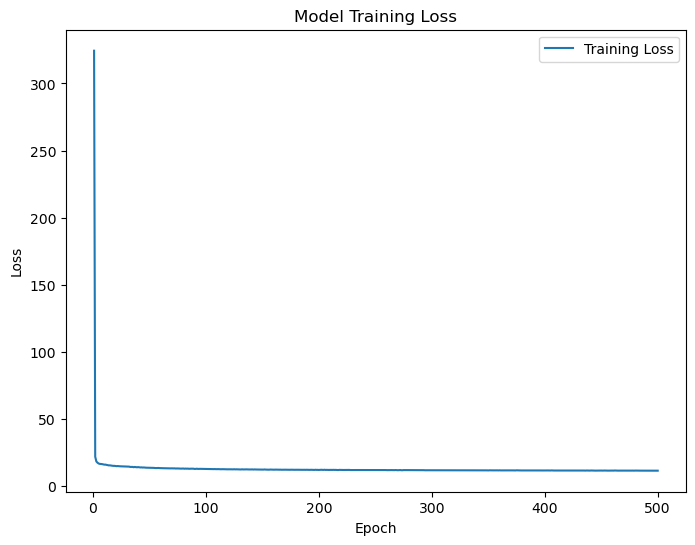

In [118]:
plt.figure(figsize=(8, 6))
plt.plot(range(1, epochs+1), epoch_losses, label='Training Loss')
plt.title('Model Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

prediction (first hundred samples)

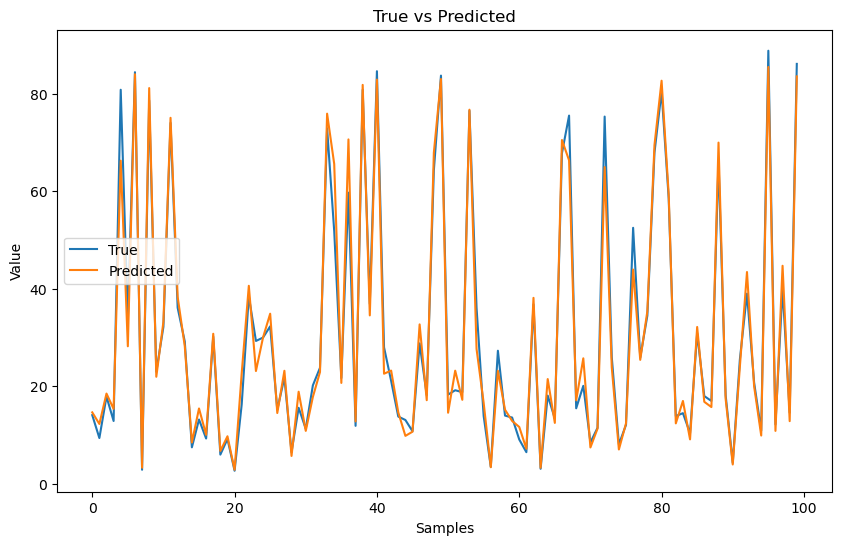

In [119]:
model.eval()
test_inputs = torch.tensor(X_test.iloc[:100].values.astype(float)).to(device)
with torch.no_grad():
    predictions = model(test_inputs.to(torch.float32)).cpu().numpy()

plt.figure(figsize=(10, 6))

plt.plot(y_test.iloc[:100].values, label='True')
plt.plot(predictions, label='Predicted')

plt.title('True vs Predicted')
plt.xlabel('Samples')
plt.ylabel('Value')
plt.legend()
plt.show()

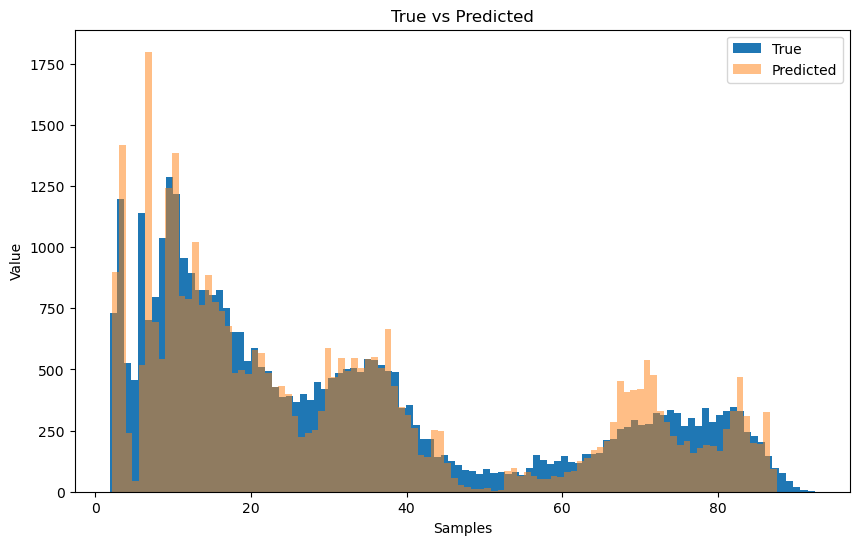

In [120]:
model.eval()
test_inputs = torch.tensor(X_test.values.astype(float)).to(device)
with torch.no_grad():
    predictions = model(test_inputs.to(torch.float32)).cpu().numpy()

plt.figure(figsize=(10, 6))

plt.hist(y_test.values, label='True', bins=100)
plt.hist(predictions, label='Predicted', bins=100, alpha=0.5)

plt.title('True vs Predicted')
plt.xlabel('Samples')
plt.ylabel('Value')
plt.legend()
plt.show()

In [121]:
model.eval()
test_inputs = torch.tensor(X_test.values.astype(float)).to(device)
with torch.no_grad():
    predictions = model(test_inputs.to(torch.float32)).cpu().numpy()

mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print("Mean Squared Error (MSE):", mse)
print("R-squared (R2):", r2)

Mean Squared Error (MSE): 11.423889069235793
R-squared (R2): 0.9821381101494809


***Previous Results***

Mean Squared Error (MSE): 12.080636051574318

R-squared (R2): 0.9811112494904624

## Long Training

In [122]:
df = pd.read_csv('merged_v1.1.csv')

df = df[['Category', 'Measure', 'x', 'y', 'Data_Value']]
df = pd.get_dummies(df)

y = df['Data_Value']
X = df.drop(columns=['Data_Value'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Complex DNN Architecture

In [123]:
class MyModel(nn.Module):
    def __init__(self, input_size):
        super(MyModel, self).__init__()
        self.fc1 = nn.Linear(input_size, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 32)
        self.fc4 = nn.Linear(32, 16)
        self.fc5 = nn.Linear(16, 1)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.relu(self.fc3(x))
        x = self.relu(self.fc4(x))
        x = self.fc5(x)
        return x

Parameter Configuration

In [125]:
y = df['Data_Value']
X = df.drop(columns=['Data_Value'])

epochs = 1000

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

input_size = X_train.shape[1]
model = MyModel(input_size)
dataset = MyDataset(X_train, y_train)

# GPU if available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device = torch.device('cuda')
model = model.to(device)

# DataLoader to handle batching of data
data_loader = DataLoader(dataset, batch_size=128, shuffle=True)

# Loss function and Optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.0005)

Training

In [126]:
epoch_losses = []  # list to store the training losses

# Training loop
for epoch in range(epochs):
    running_loss = 0.01  # running loss for each epoch
    
    for i, data in enumerate(data_loader, 0):  # iterate over each batch of the data loader
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # move the inputs and labels to the device
        inputs = inputs.to(device)
        labels = labels.to(device)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = model(inputs)
        loss = criterion(outputs, labels.unsqueeze(1))
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * inputs.size(0)  # loss for the current batch
    
    epoch_loss = running_loss / len(dataset)  # average loss for the epoch
    epoch_losses.append(epoch_loss)  # epoch loss in the list

    print('Epoch', epoch, 'loss:', epoch_loss)

Epoch 0 loss: 331.66747984159224
Epoch 1 loss: 21.195908768634457
Epoch 2 loss: 18.045389561183498
Epoch 3 loss: 17.14541236532611
Epoch 4 loss: 16.877158582637716
Epoch 5 loss: 16.46048932145079
Epoch 6 loss: 16.385551899352862
Epoch 7 loss: 16.054298939624026
Epoch 8 loss: 16.12455159957895
Epoch 9 loss: 15.870873560129814
Epoch 10 loss: 15.736166246370091
Epoch 11 loss: 15.677377566342114
Epoch 12 loss: 15.669398914883763
Epoch 13 loss: 15.538971228577653
Epoch 14 loss: 15.457452793320277
Epoch 15 loss: 15.384804200363998
Epoch 16 loss: 15.229165812009724
Epoch 17 loss: 15.09678703736359
Epoch 18 loss: 14.973814282820365
Epoch 19 loss: 14.962167847474234
Epoch 20 loss: 14.991531484434756
Epoch 21 loss: 14.898096445913245
Epoch 22 loss: 14.829620329599894
Epoch 23 loss: 14.732194445719463
Epoch 24 loss: 14.756727236432345
Epoch 25 loss: 14.666385543455934
Epoch 26 loss: 14.596211958488094
Epoch 27 loss: 14.607942340054763
Epoch 28 loss: 14.469515351023357
Epoch 29 loss: 14.3848286271

training loss

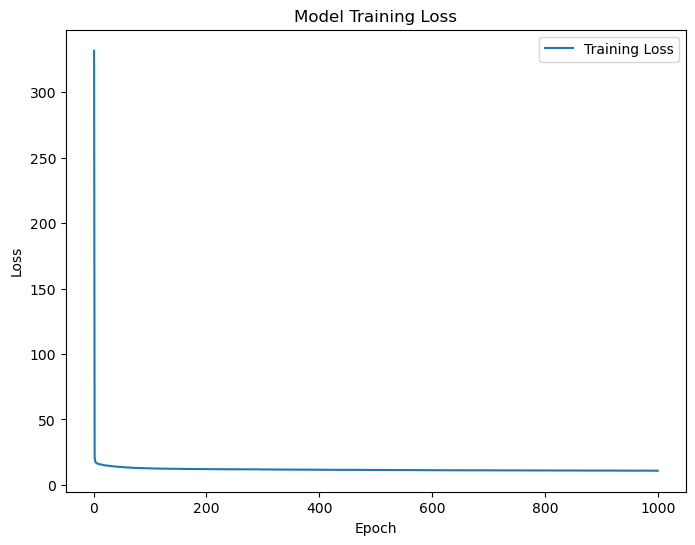

In [127]:
plt.figure(figsize=(8, 6))
plt.plot(range(1, epochs+1), epoch_losses, label='Training Loss')
plt.title('Model Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

prediction (first hundred samples)

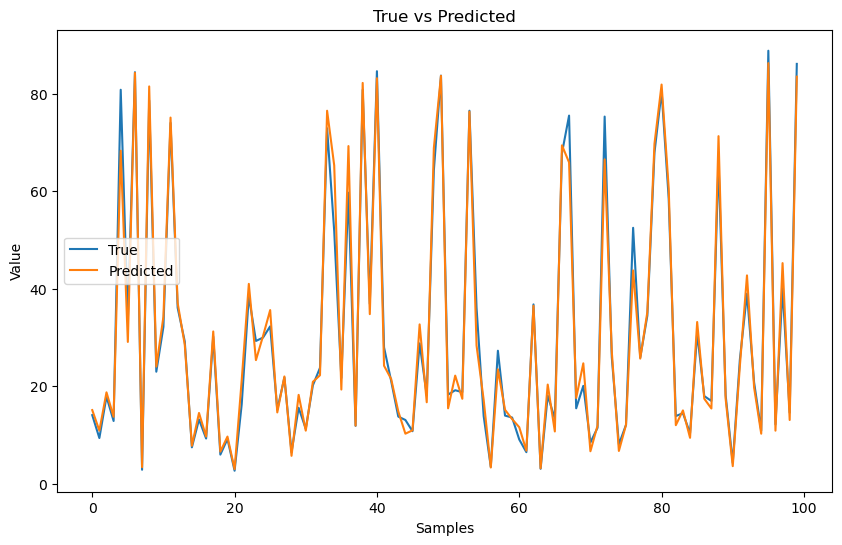

In [128]:
model.eval()
test_inputs = torch.tensor(X_test.iloc[:100].values.astype(float)).to(device)
with torch.no_grad():
    predictions = model(test_inputs.to(torch.float32)).cpu().numpy()

plt.figure(figsize=(10, 6))

plt.plot(y_test.iloc[:100].values, label='True')
plt.plot(predictions, label='Predicted')

plt.title('True vs Predicted')
plt.xlabel('Samples')
plt.ylabel('Value')
plt.legend()
plt.show()

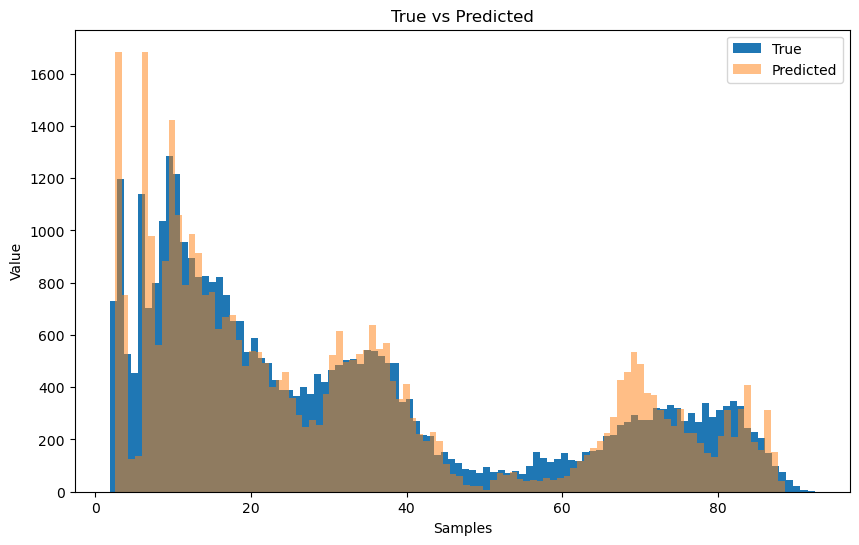

In [129]:
model.eval()
test_inputs = torch.tensor(X_test.values.astype(float)).to(device)
with torch.no_grad():
    predictions = model(test_inputs.to(torch.float32)).cpu().numpy()

plt.figure(figsize=(10, 6))

plt.hist(y_test.values, label='True', bins=100)
plt.hist(predictions, label='Predicted', bins=100, alpha=0.5)

plt.title('True vs Predicted')
plt.xlabel('Samples')
plt.ylabel('Value')
plt.legend()
plt.show()

In [130]:
model.eval()
test_inputs = torch.tensor(X_test.values.astype(float)).to(device)
with torch.no_grad():
    predictions = model(test_inputs.to(torch.float32)).cpu().numpy()

mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print("Mean Squared Error (MSE):", mse)
print("R-squared (R2):", r2)

Mean Squared Error (MSE): 11.006890504549192
R-squared (R2): 0.9827901107409709
